In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("/content/bundesliga.csv")
df.head()

SEASON        LEAGUE        DATE       HOMETEAM        AWAYTEAM FTSC  FTHG  \
0    1994  Bundesliga 1  1993-08-07  Bayern Munich        Freiburg  3-1     3   
1    1994  Bundesliga 1  1993-08-07       Dortmund       Karlsruhe  2-1     2   
2    1994  Bundesliga 1  1993-08-07       Duisburg      Leverkusen  2-2     2   
3    1994  Bundesliga 1  1993-08-07        FC Koln  Kaiserslautern  0-2     0   
4    1994  Bundesliga 1  1993-08-07        Hamburg        Nurnberg  5-2     5   

   FTAG  FTTG  
0     1     4  
1     1     3  
2     2     4  
3     2     2  
4     2     7

In [51]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [52]:
df.head()

SEASON        LEAGUE       DATE       HOMETEAM        AWAYTEAM FTSC  FTHG  \
0    1994  Bundesliga 1 1993-08-07  Bayern Munich        Freiburg  3-1     3   
1    1994  Bundesliga 1 1993-08-07       Dortmund       Karlsruhe  2-1     2   
2    1994  Bundesliga 1 1993-08-07       Duisburg      Leverkusen  2-2     2   
3    1994  Bundesliga 1 1993-08-07        FC Koln  Kaiserslautern  0-2     0   
4    1994  Bundesliga 1 1993-08-07        Hamburg        Nurnberg  5-2     5   

   FTAG  FTTG  
0     1     4  
1     1     3  
2     2     4  
3     2     2  
4     2     7

In [53]:
df.isnull().sum()

SEASON      0
LEAGUE      0
DATE        0
HOMETEAM    0
AWAYTEAM    0
FTSC        0
FTHG        0
FTAG        0
FTTG        0
dtype: int64

Part 3

In [54]:
def calculate_points(row):
    if row['FTHG'] > row['FTAG']:
        return 3  # home team wins
    elif row['FTHG'] < row['FTAG']:
        return 0  # away team wins
    else:
        return 1  # draw

In [55]:
df['Home_Points'] = df.apply(lambda row: calculate_points(row), axis=1)
df['Away_Points'] = df.apply(lambda row: calculate_points(row), axis=1)

In [56]:
season_points = {}

for season in df['SEASON'].unique():
    season_df = df[df['SEASON'] == season]
    points = {}

    for index, row in season_df.iterrows():
        if row['HOMETEAM'] not in points:
            points[row['HOMETEAM']] = 0
        points[row['HOMETEAM']] += row['Home_Points']
        if row['AWAYTEAM'] not in points:
            points[row['AWAYTEAM']] = 0
        points[row['AWAYTEAM']] += row['Away_Points']

    sorted_teams = sorted(points.items(), key=lambda x: x[1], reverse=True)[:6]
    season_points[season] = sorted_teams

In [57]:
season_points

{np.int64(1994): [('Dortmund', 72),
  ('Karlsruhe', 70),
  ('Bayern Munich', 67),
  ('Kaiserslautern', 67),
  ("M'Gladbach", 64),
  ('Leverkusen', 62)],
 np.int64(1995): [('Stuttgart', 67),
  ('Ein Frankfurt', 66),
  ('Werder Bremen', 62),
  ('Dortmund', 60),
  ('Schalke 04', 59),
  ('Munich 1860', 59)],
 np.int64(1996): [('Munich 1860', 63),
  ('Ein Frankfurt', 62),
  ('Bayern Munich', 59),
  ('Hamburg', 59),
  ('Dortmund', 56),
  ('Uerdingen', 56)],
 np.int64(1997): [('Werder Bremen', 72),
  ("M'gladbach", 70),
  ('Leverkusen', 69),
  ('Bochum', 68),
  ('Dortmund', 66),
  ('Freiburg', 65)],
 np.int64(1998): [('Bielefeld', 68),
  ('FC Koln', 66),
  ('Stuttgart', 64),
  ('Bochum', 62),
  ('Schalke 04', 61),
  ('Hertha', 61)],
 np.int64(1999): [('Dortmund', 75),
  ('Hertha', 68),
  ('Stuttgart', 63),
  ('Kaiserslautern', 63),
  ('Hansa Rostock', 62),
  ('Duisburg', 61)],
 np.int64(2000): [('Unterhaching', 74),
  ('Ein Frankfurt', 68),
  ('Werder Bremen', 65),
  ('Munich 1860', 62),
  ('

Above we see the top 6 teams per season.

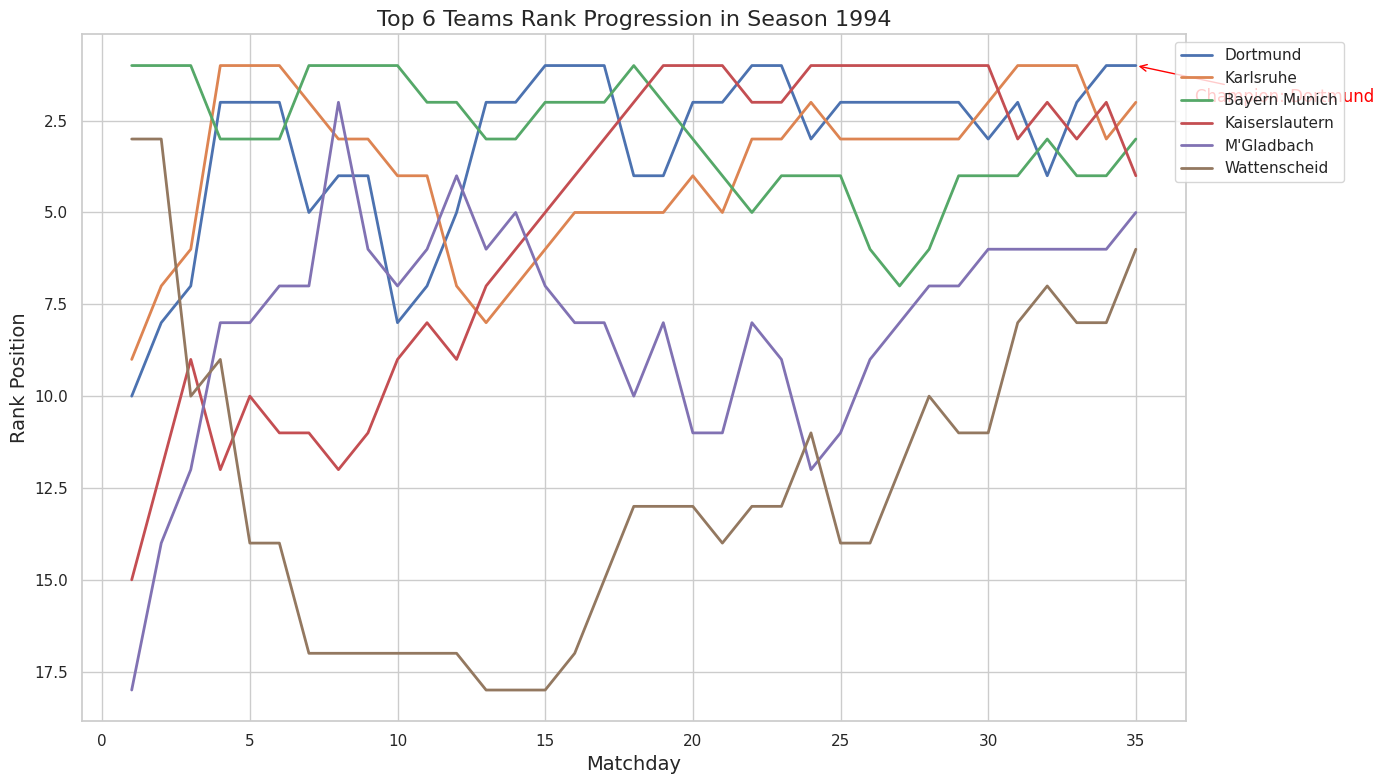

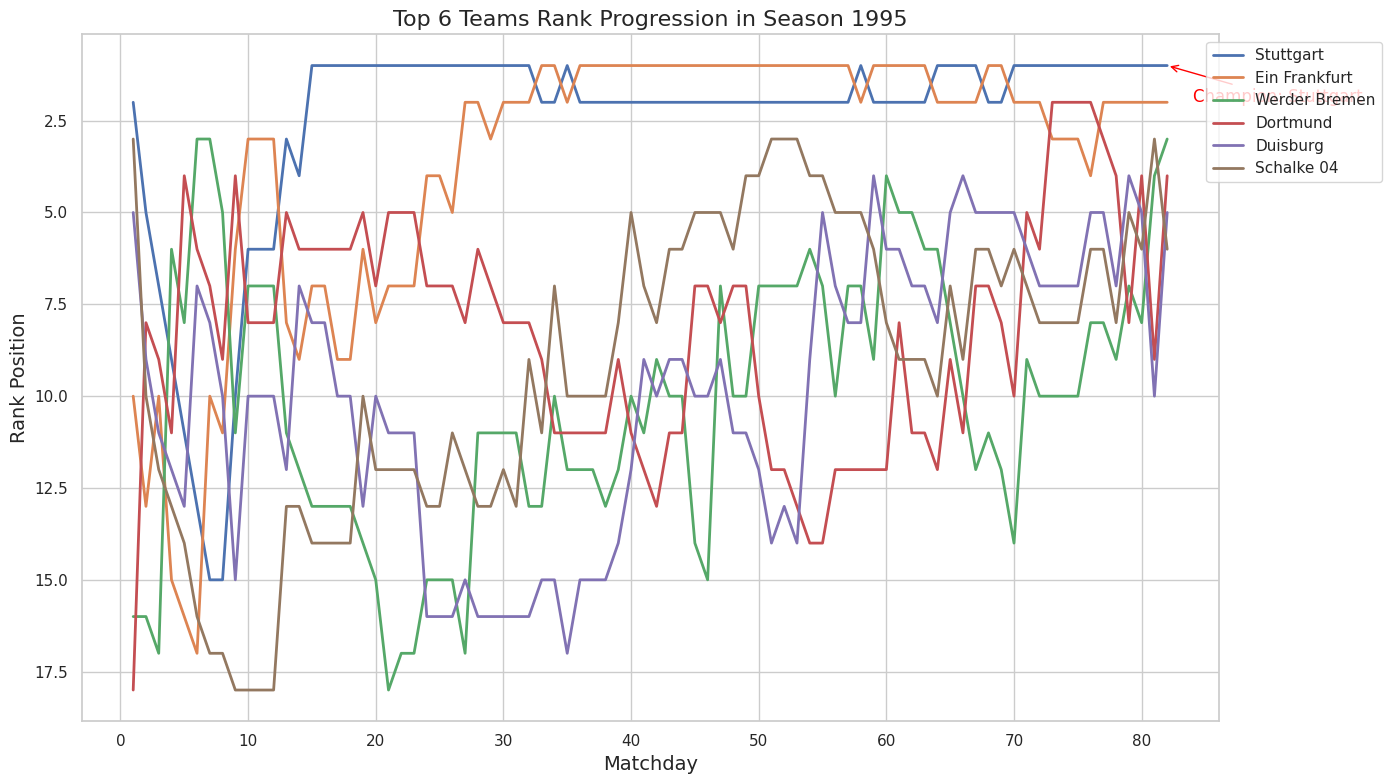

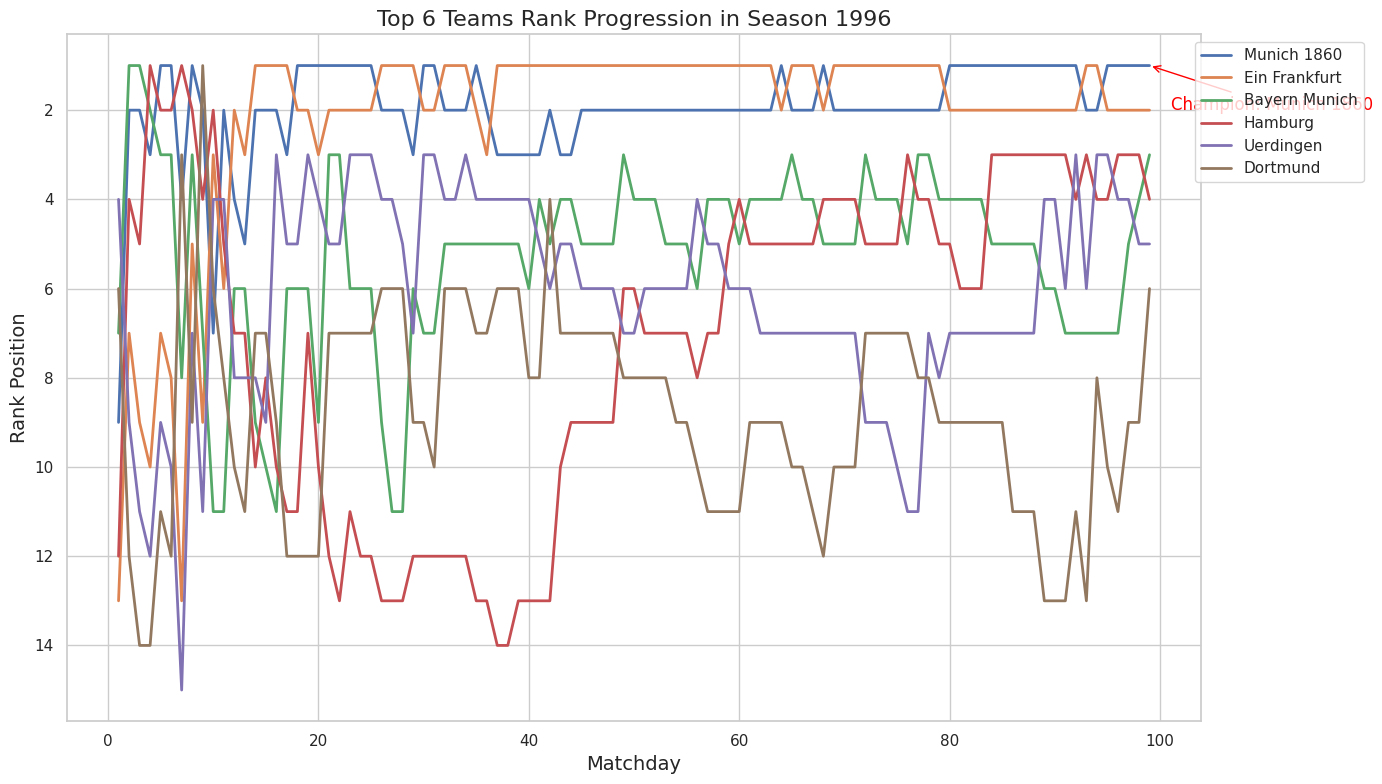

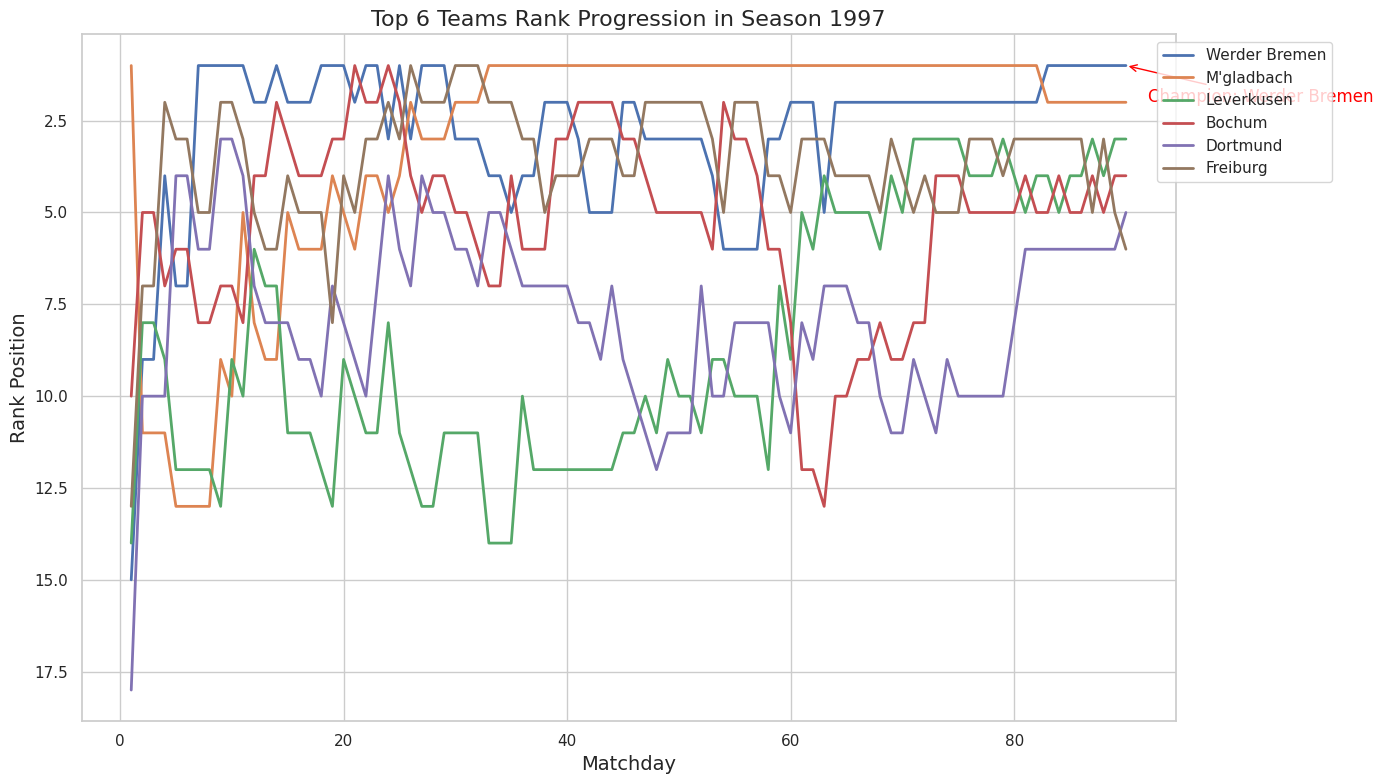

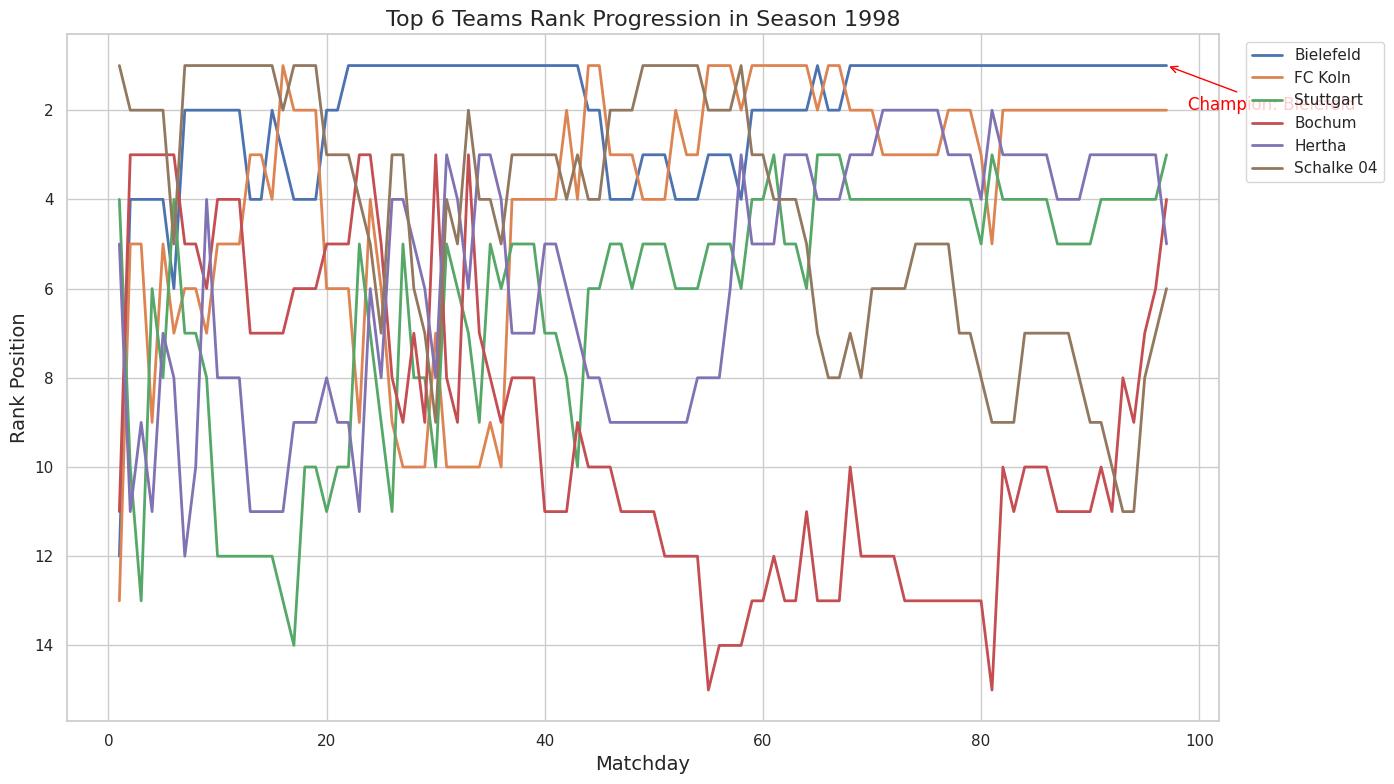

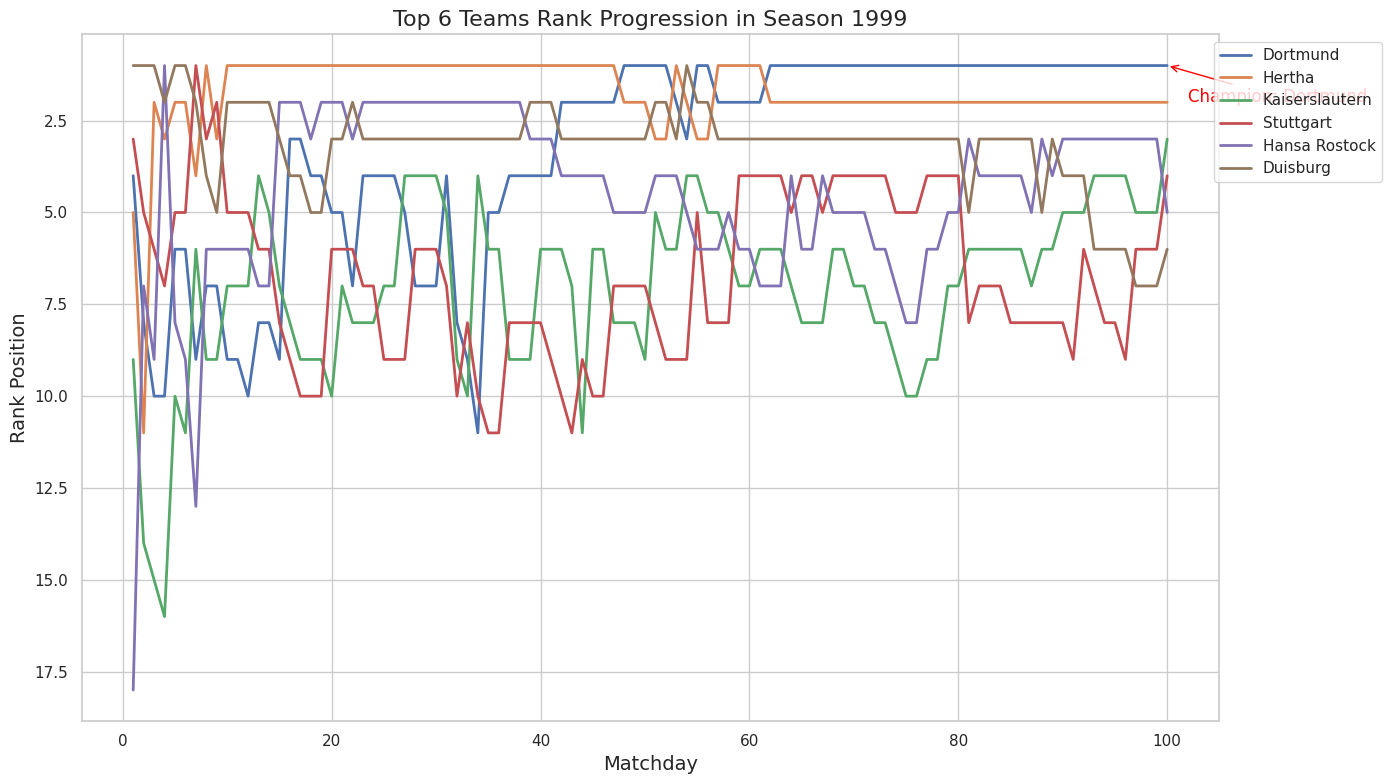

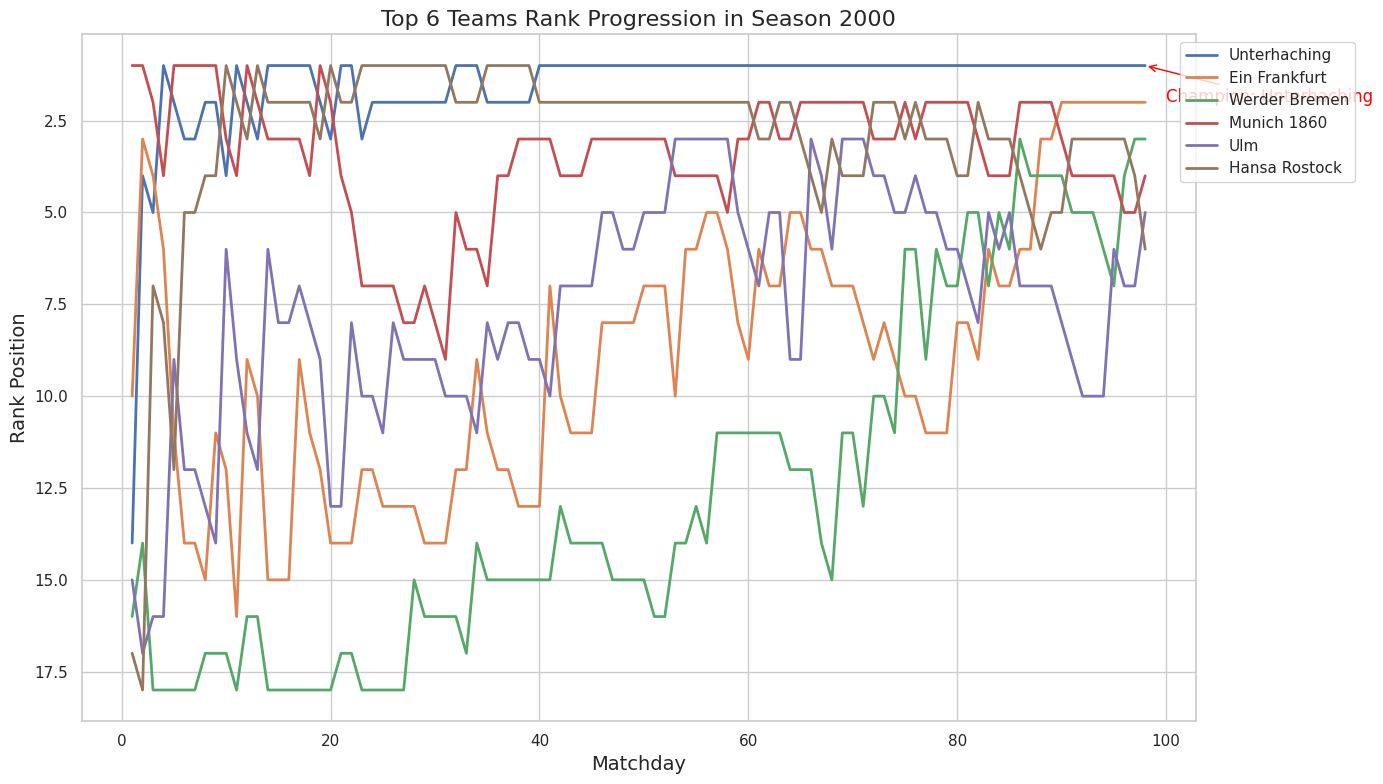

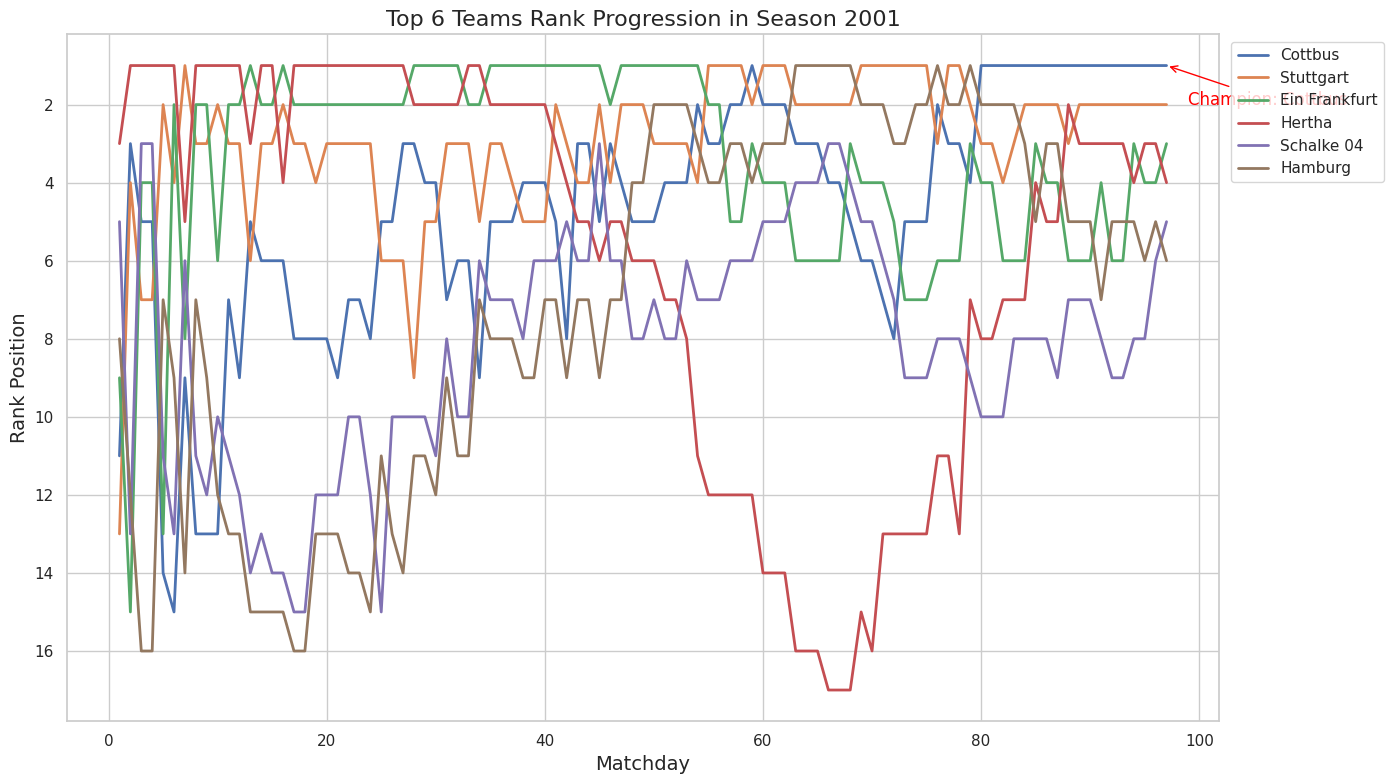

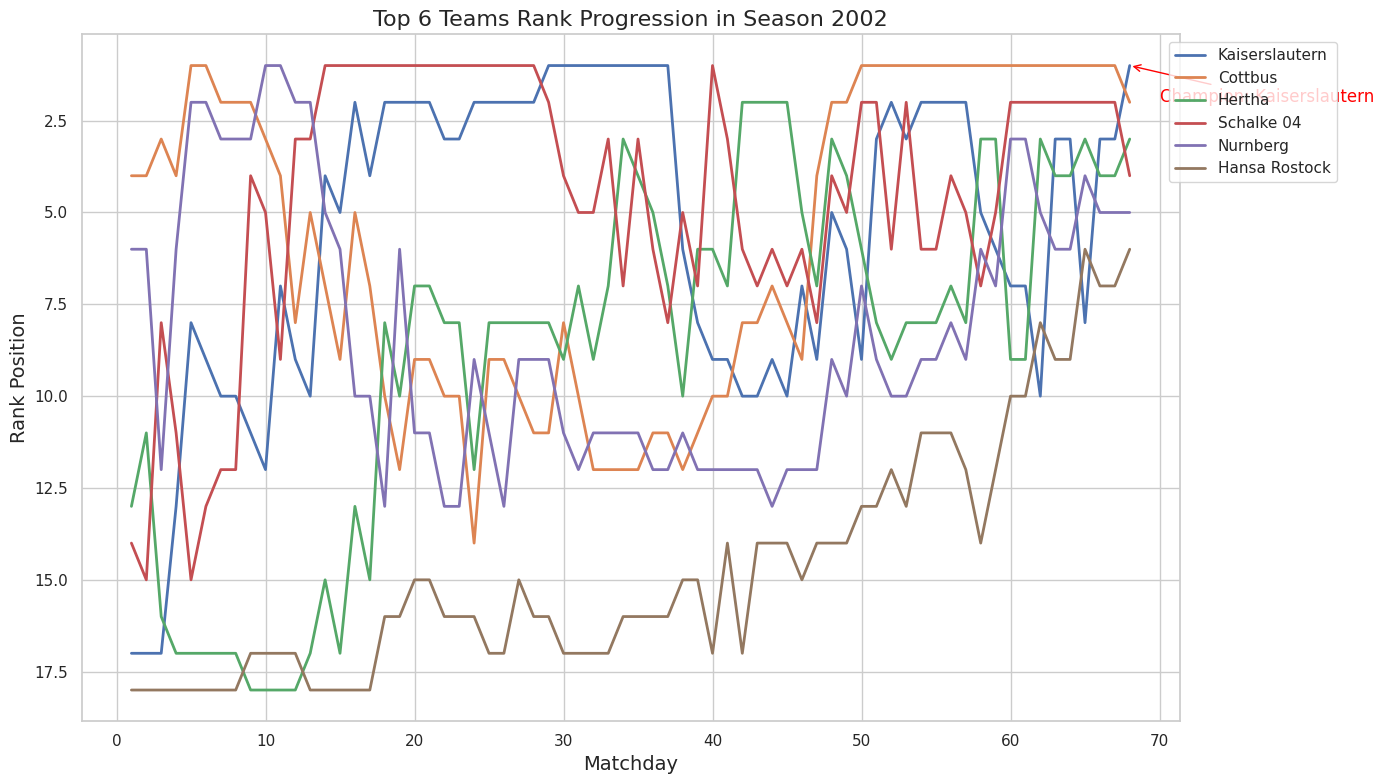

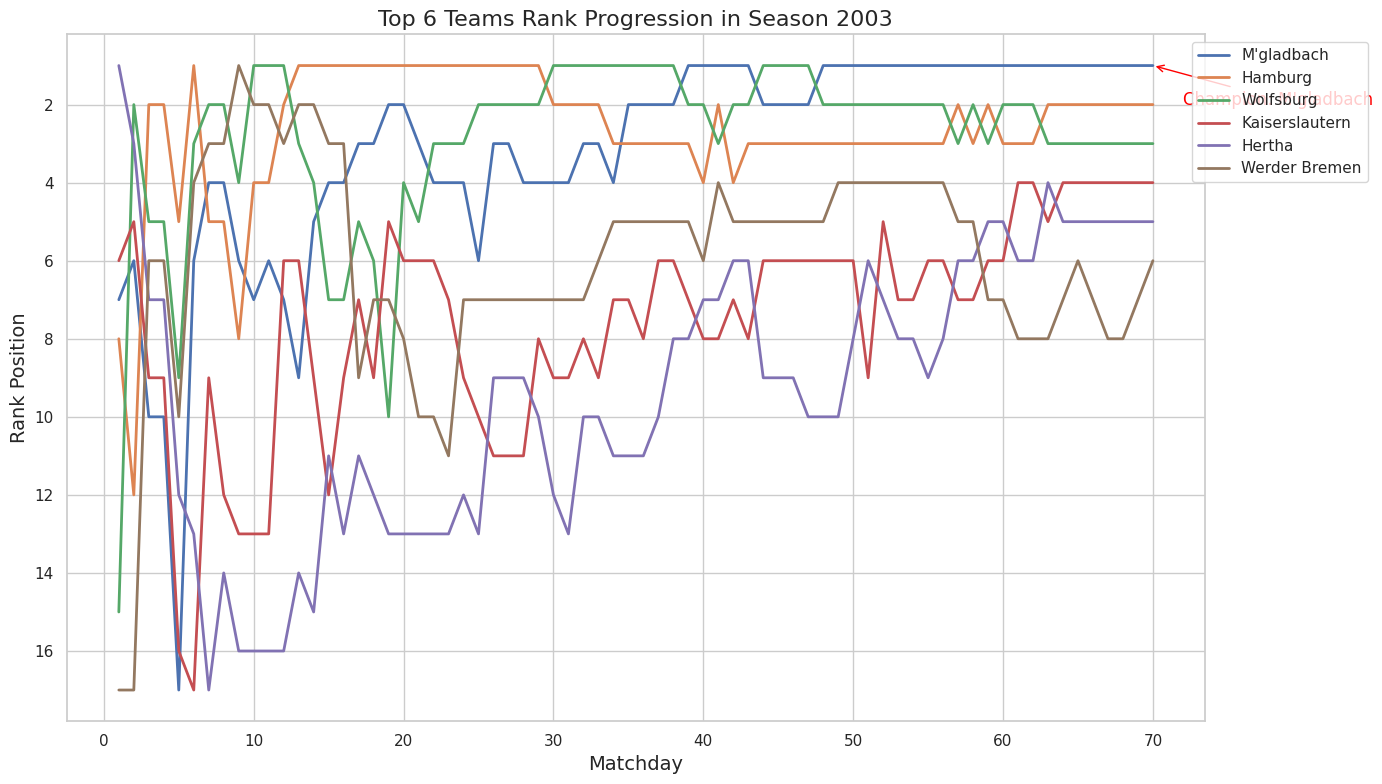

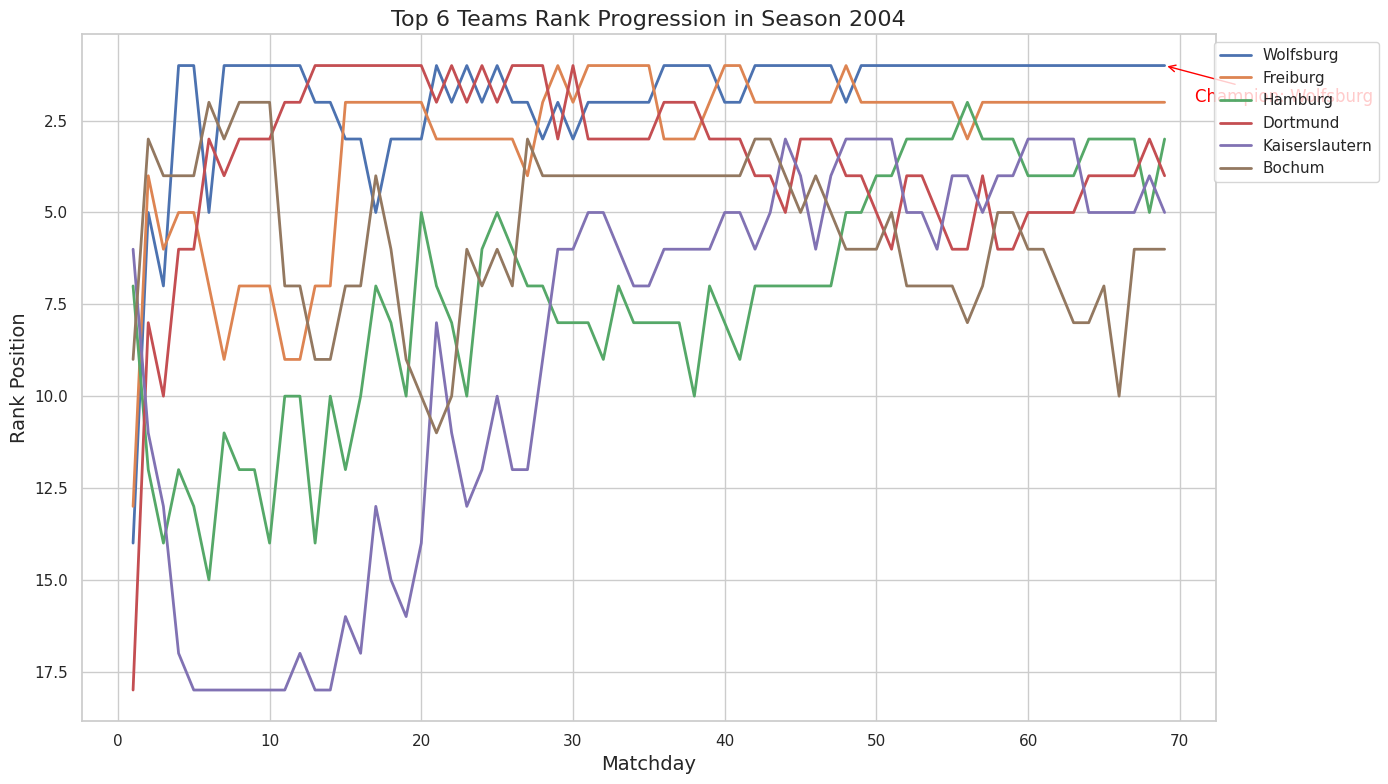

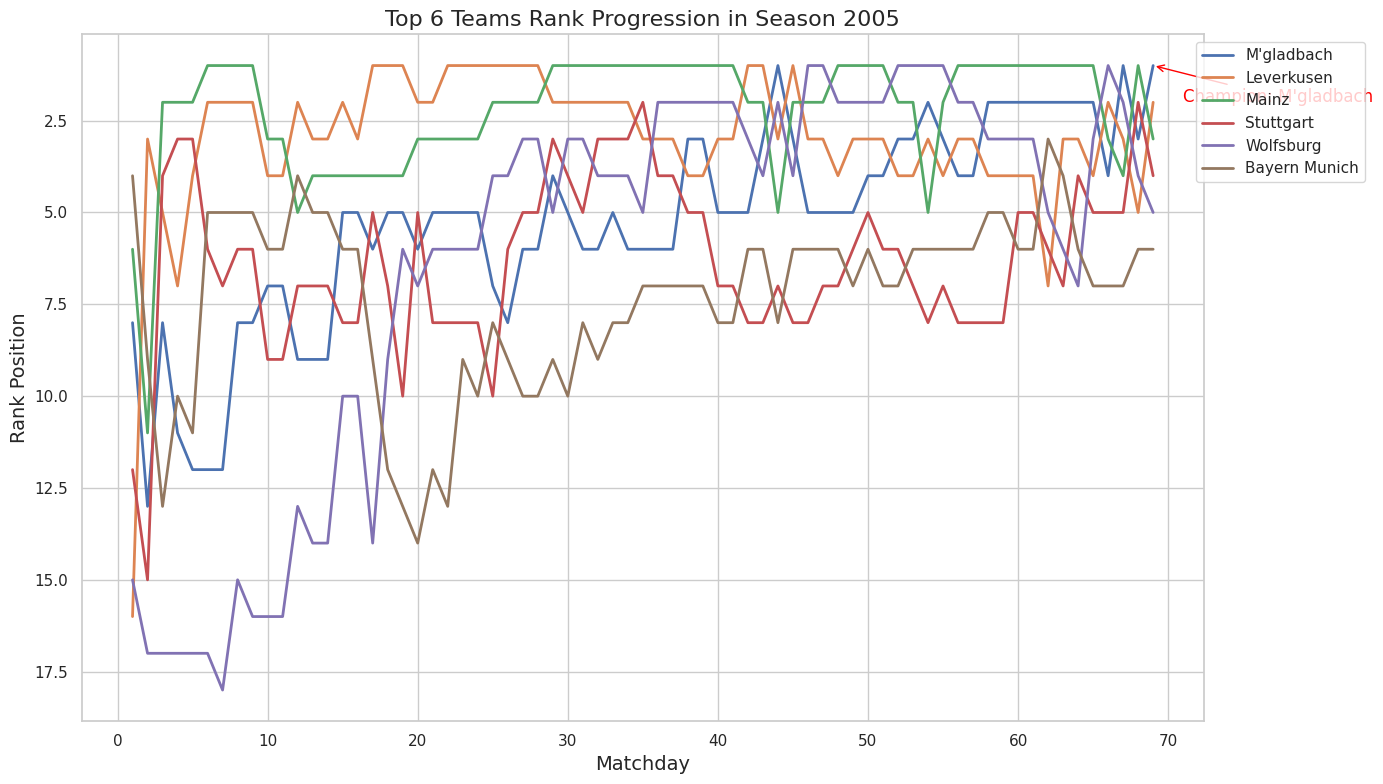

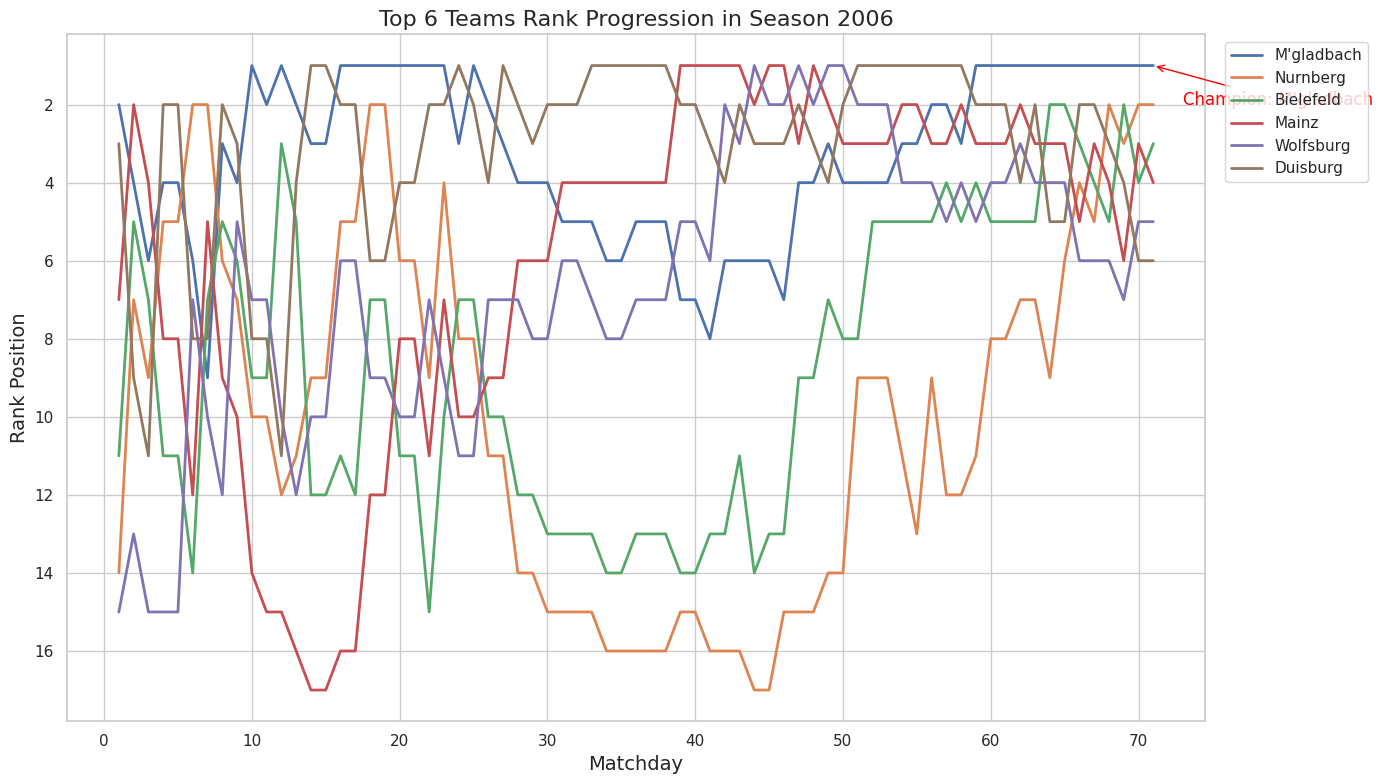

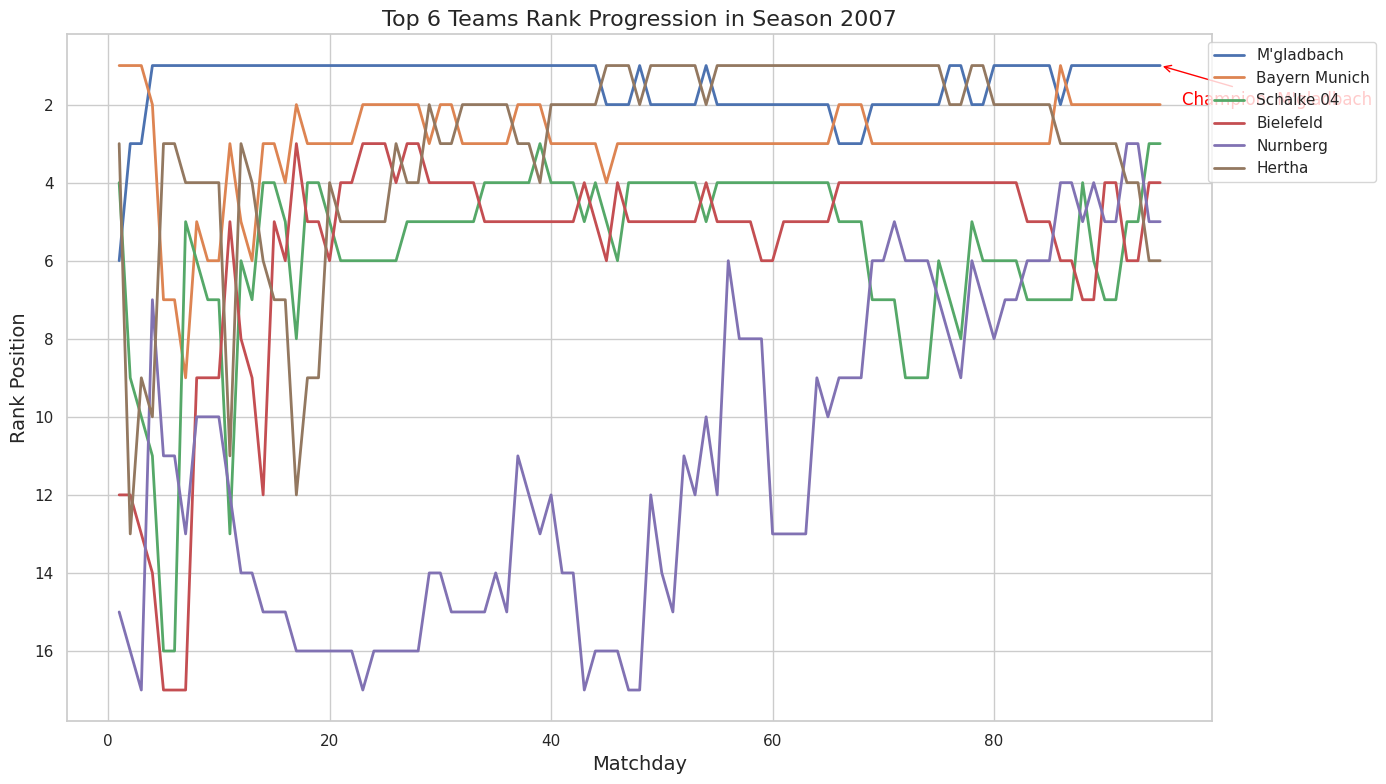

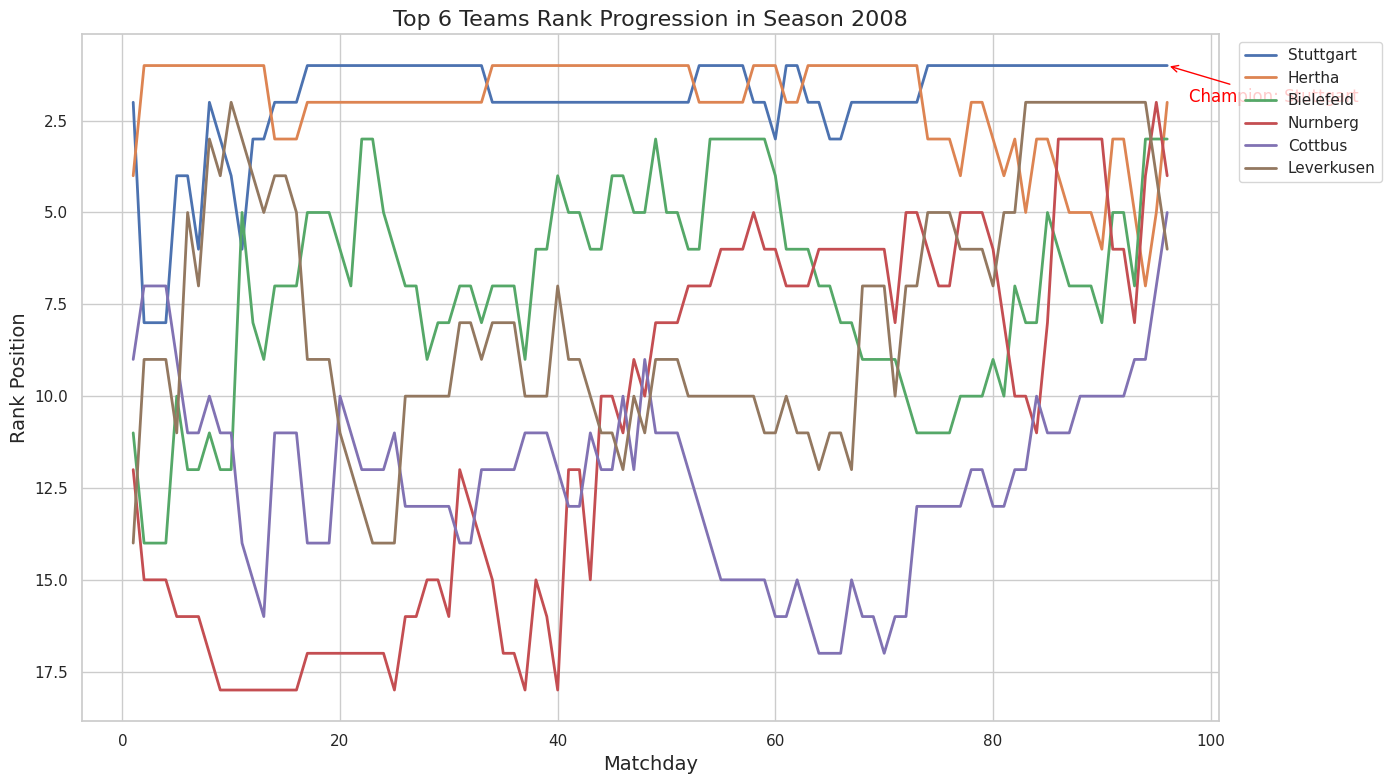

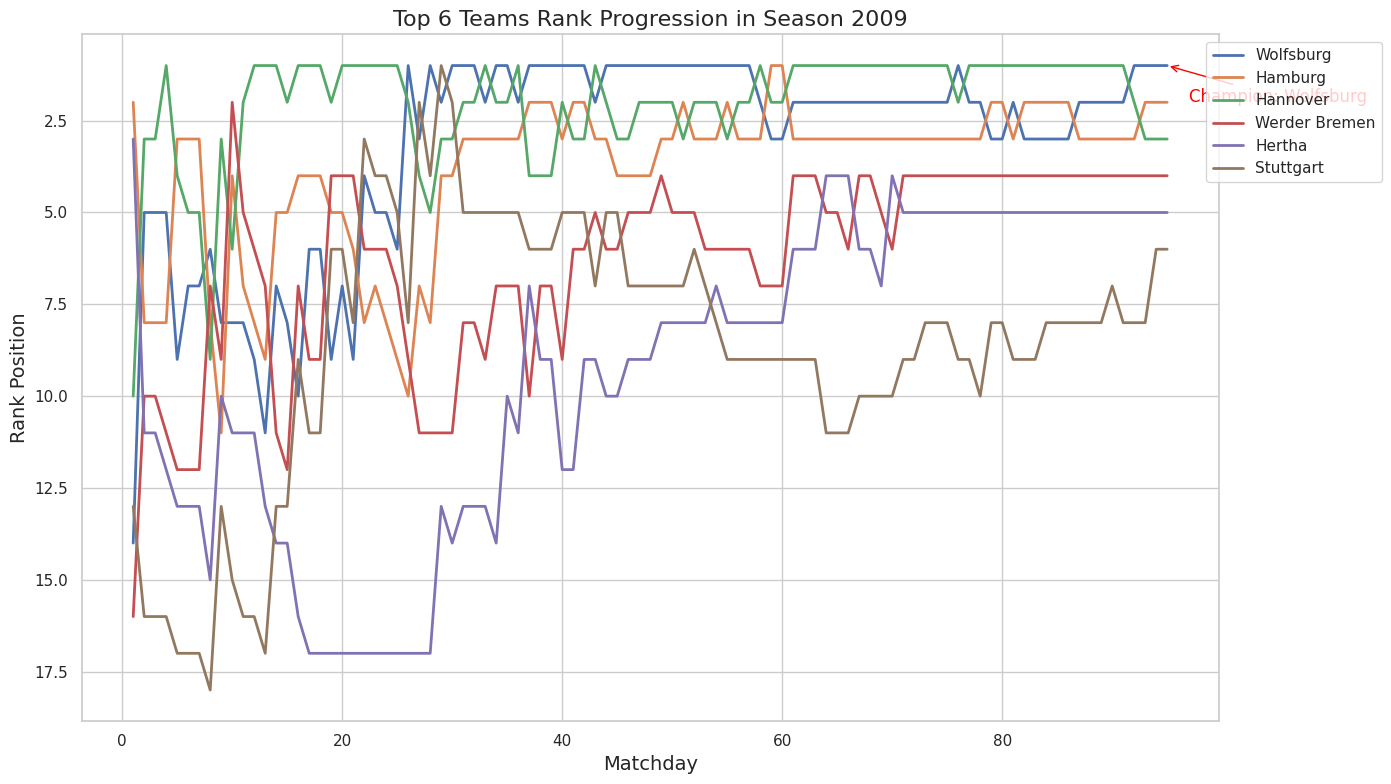

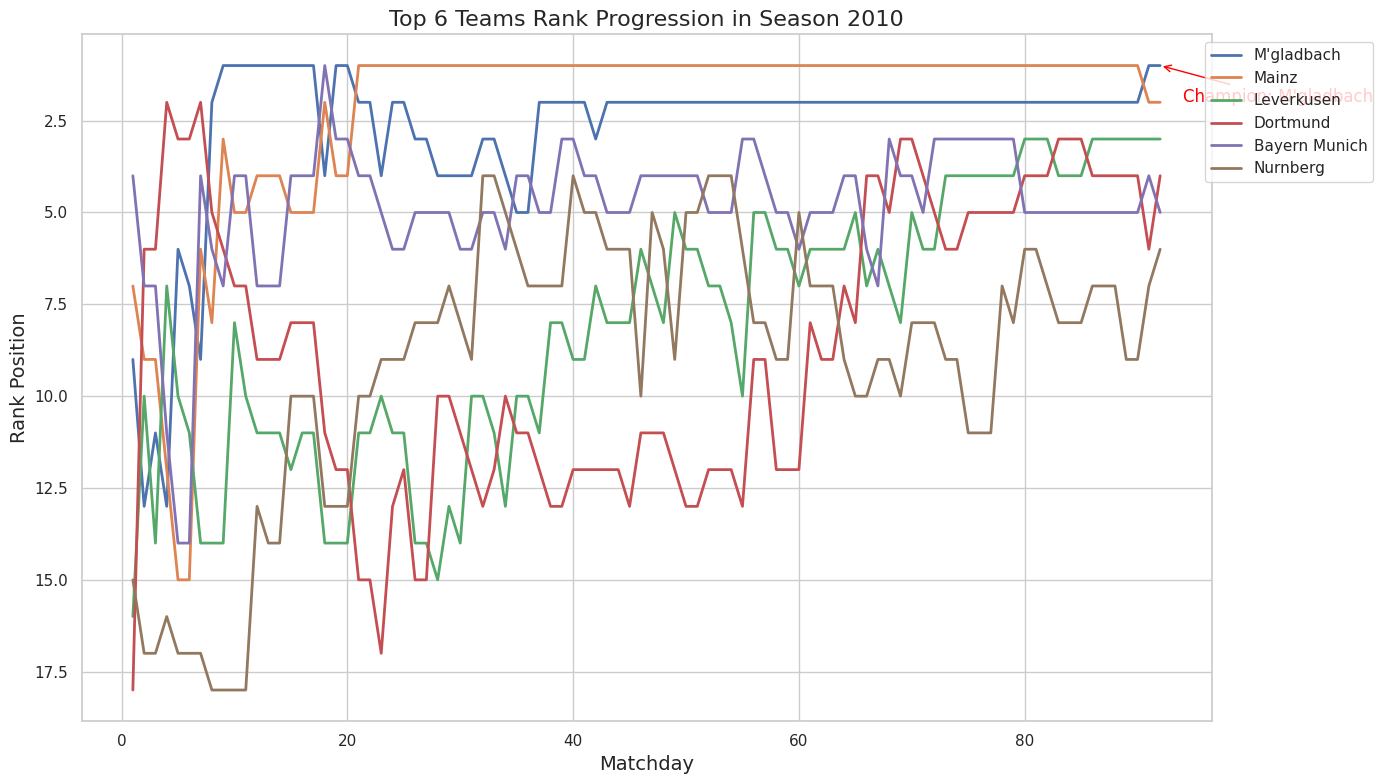

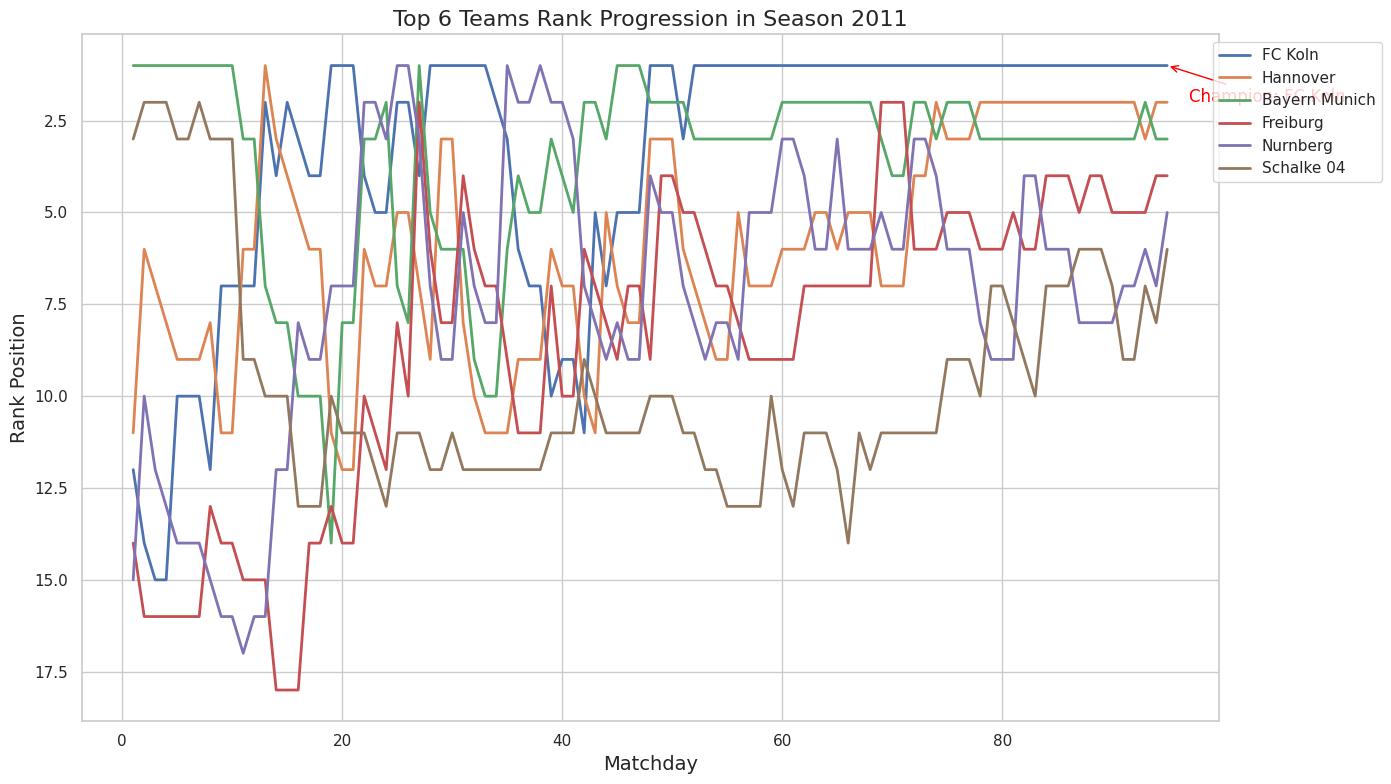

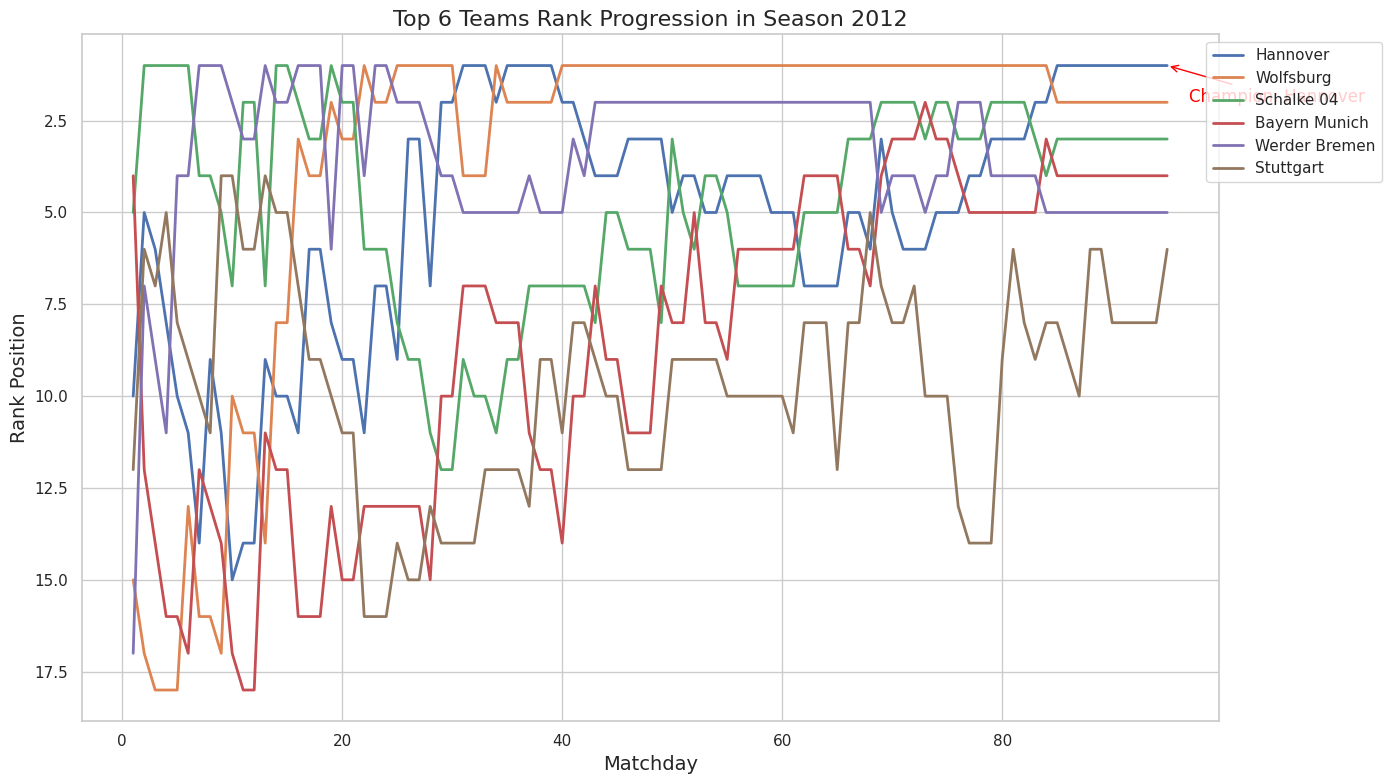

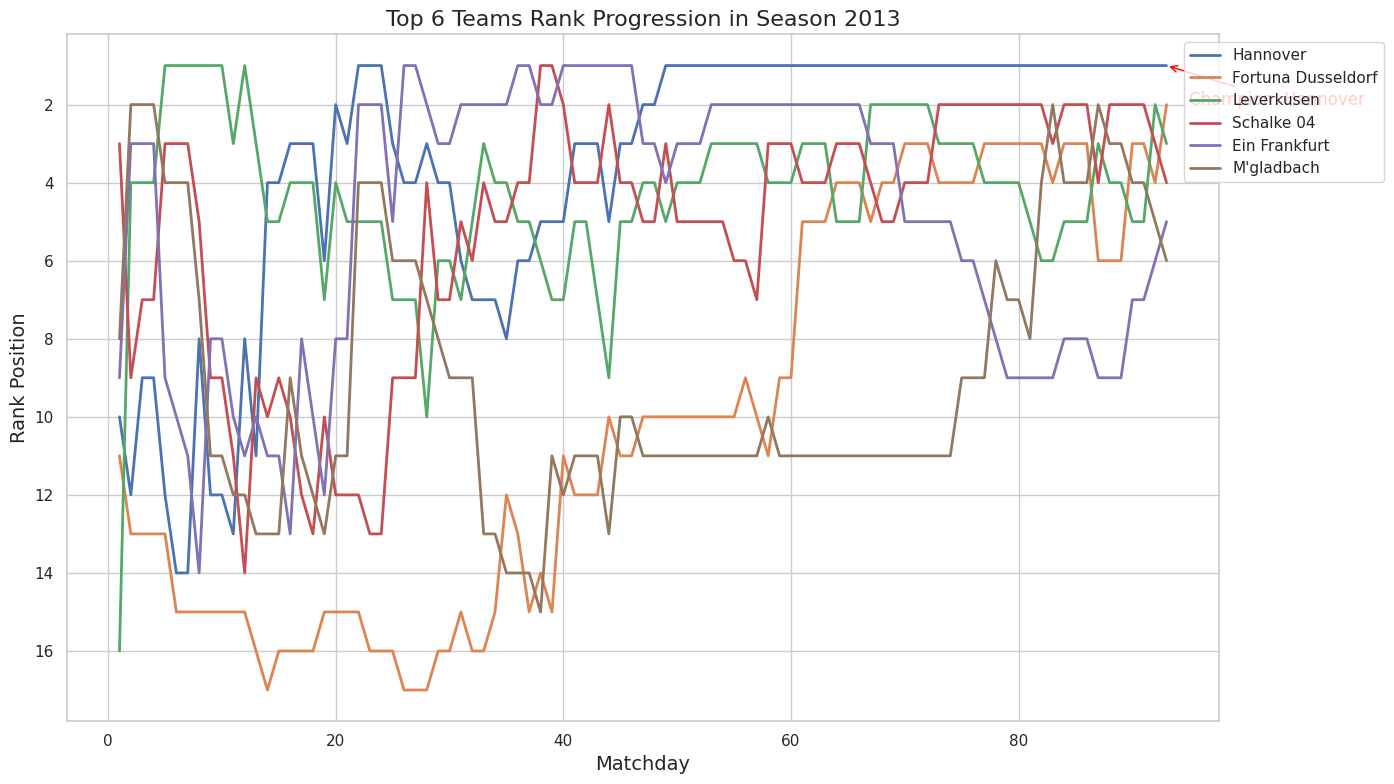

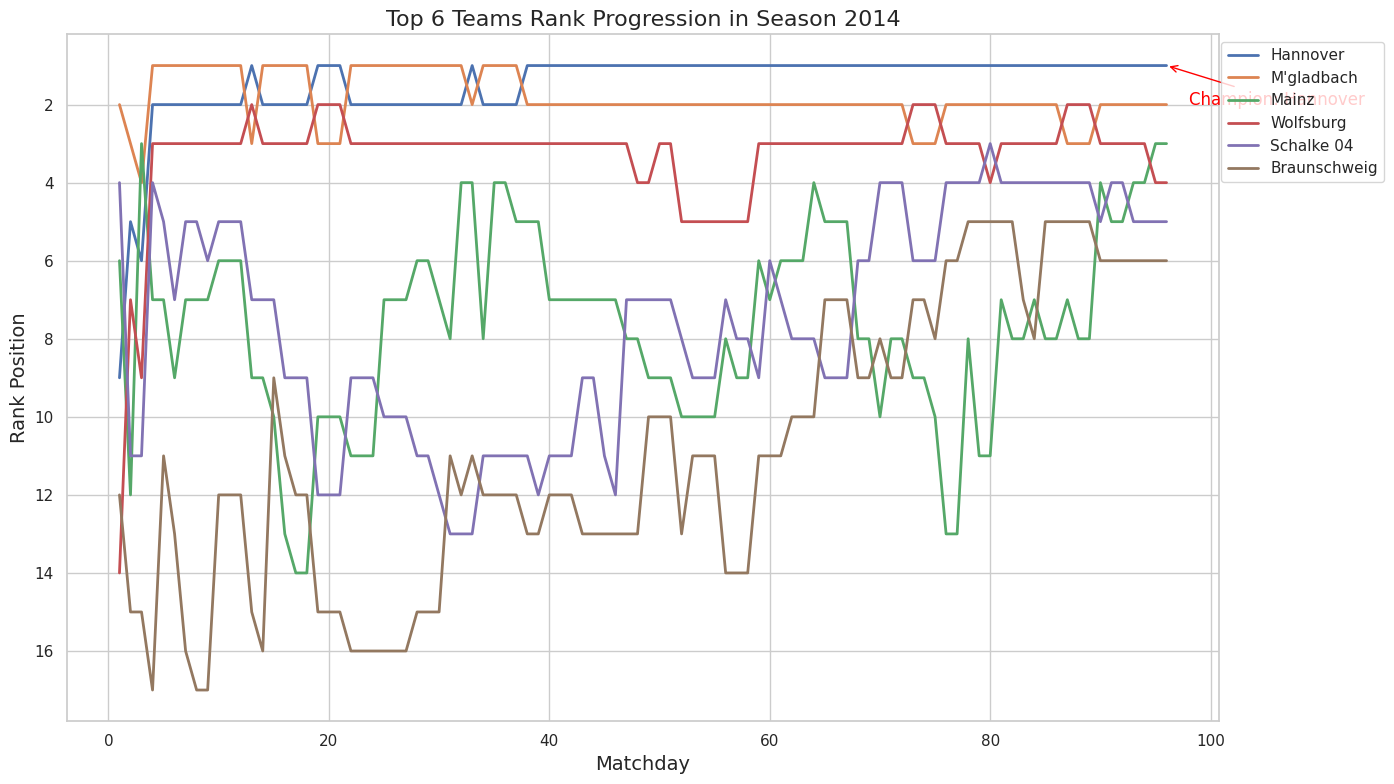

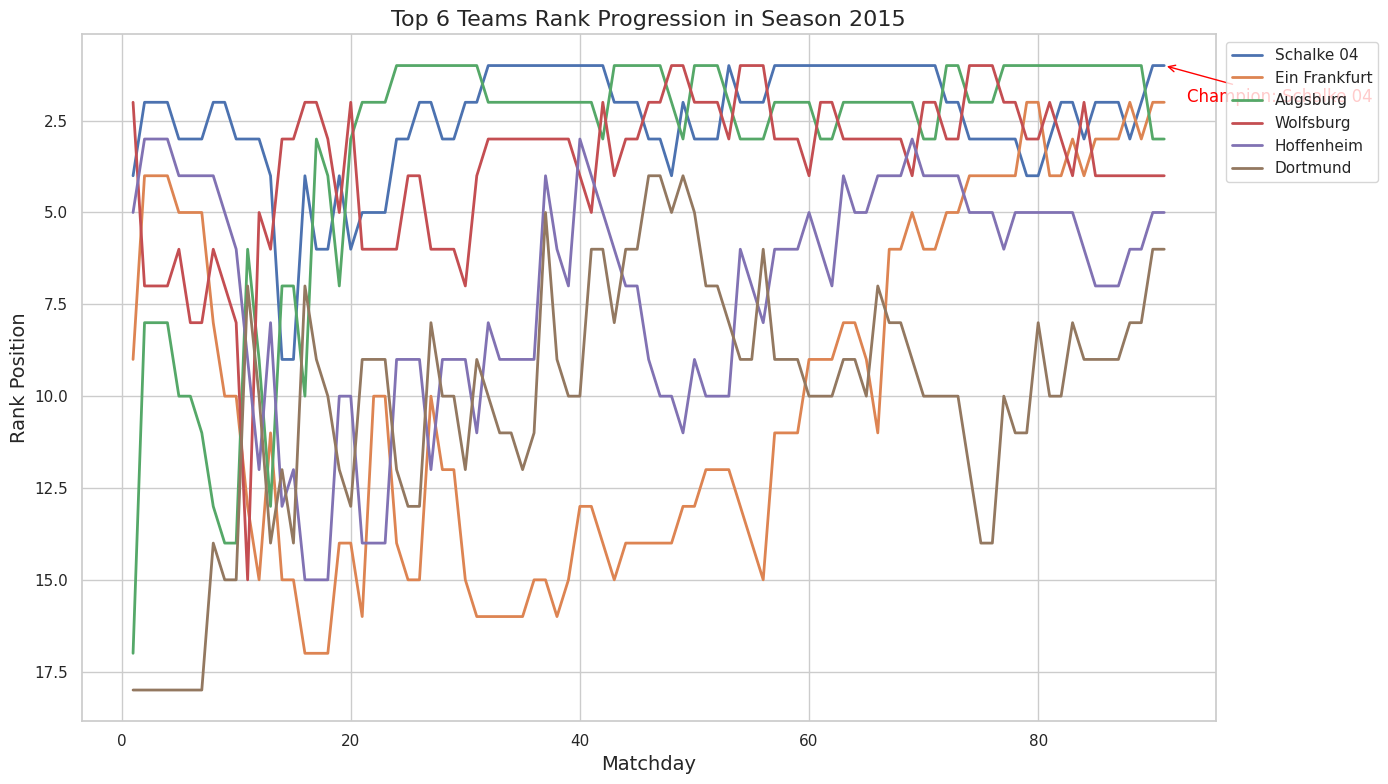

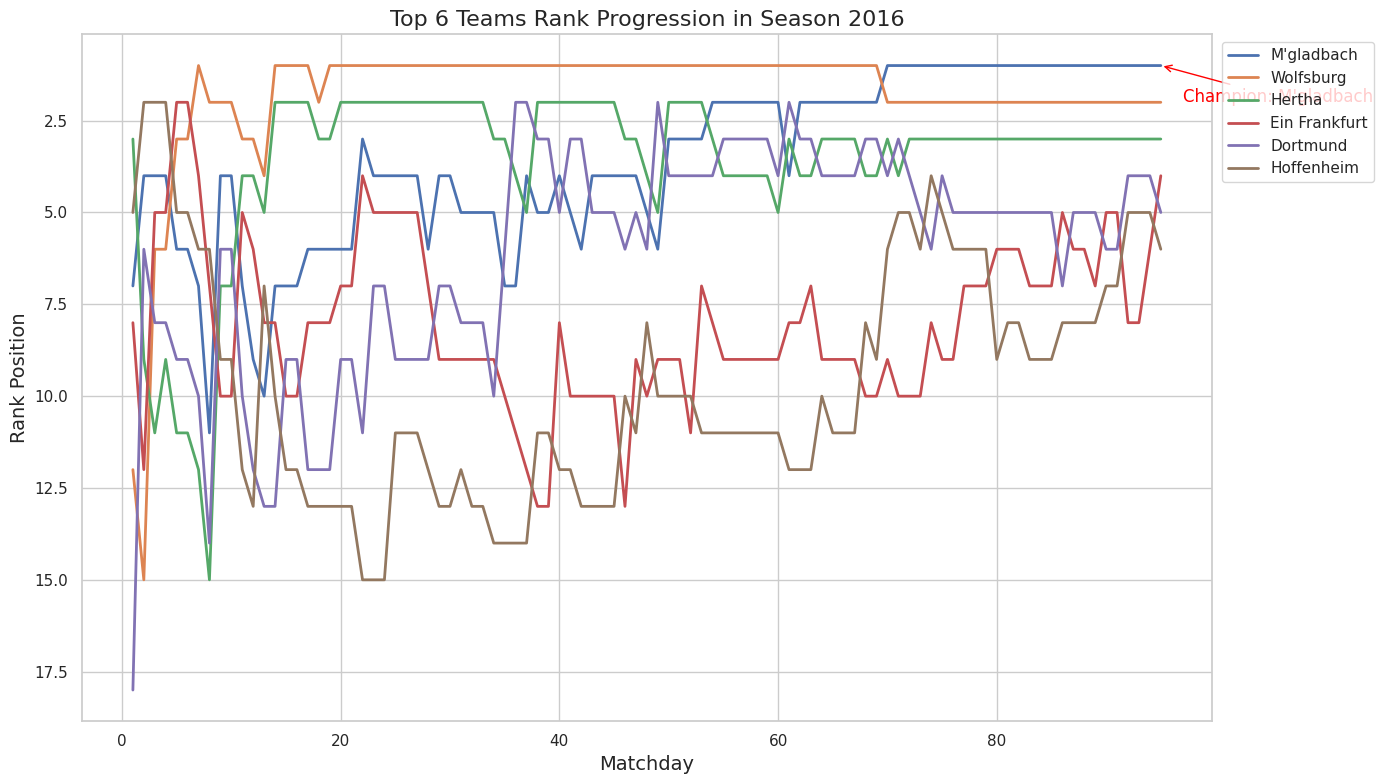

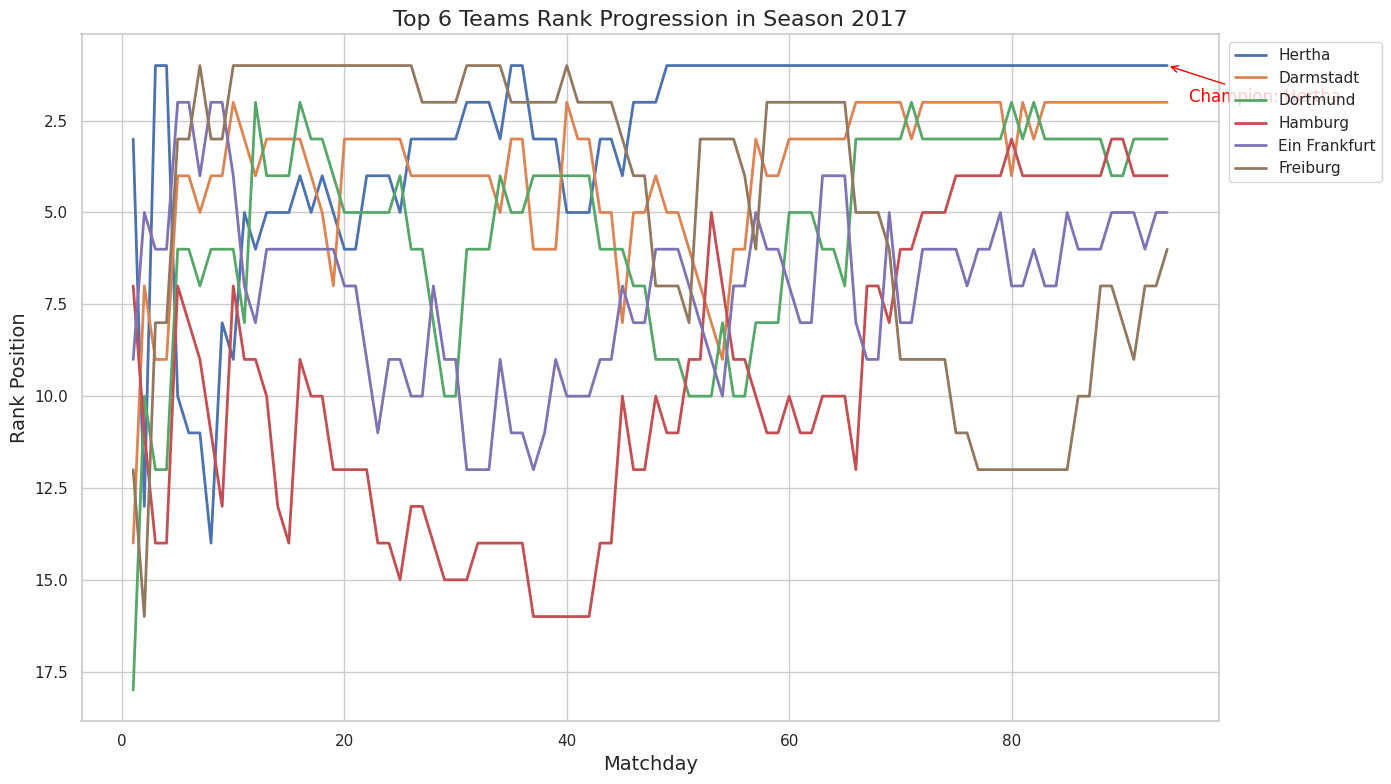

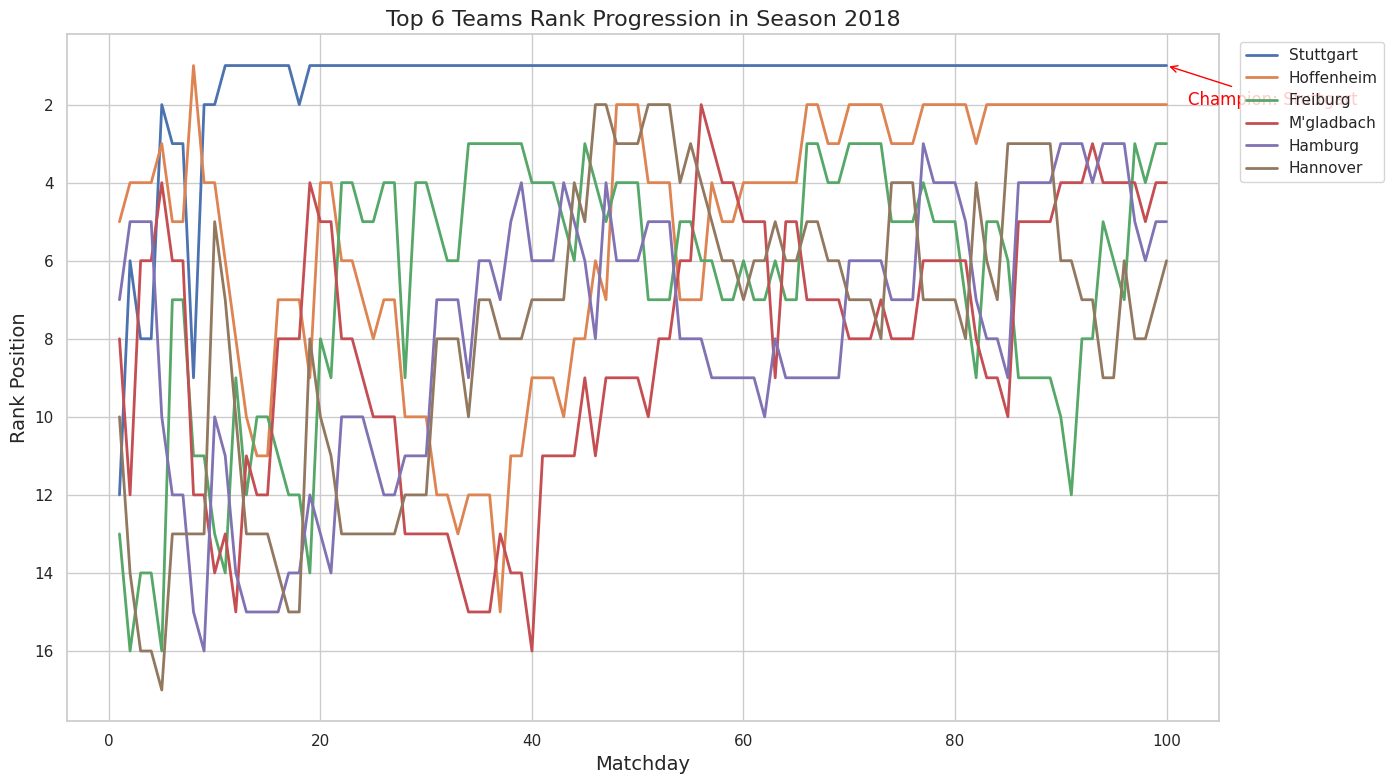

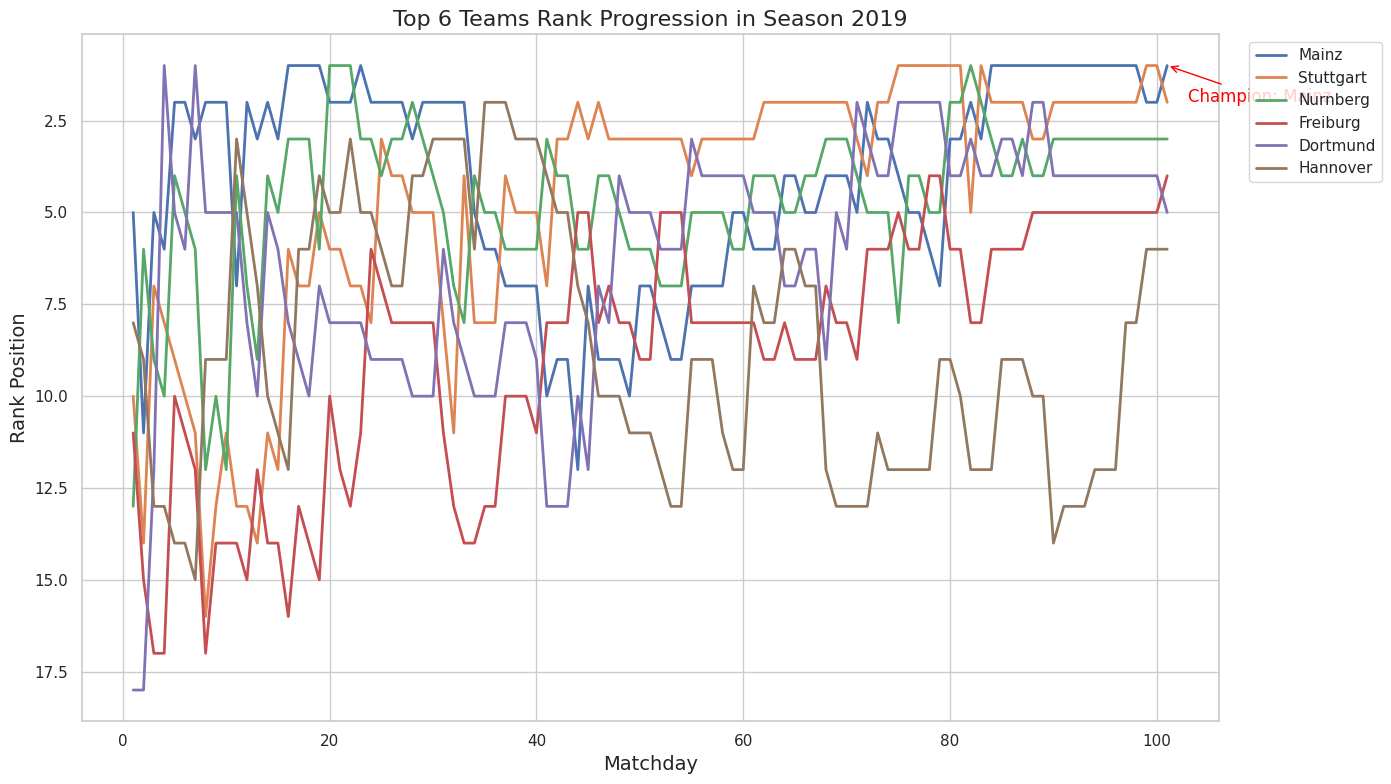

In [58]:
def plot_season_rank_progression_with_title(df):
    for season in df['SEASON'].unique():
        plt.figure(figsize=(14, 8))  # new plot for each season
        season_df = df[df['SEASON'] == season]

        points = {team: 0 for team in set(season_df['HOMETEAM']).union(set(season_df['AWAYTEAM']))}
        season_ranks = {team: [] for team in points}

        for matchday, group in season_df.groupby('DATE'):
            for _, row in group.iterrows():
                points[row['HOMETEAM']] += row['Home_Points']
                points[row['AWAYTEAM']] += row['Away_Points']

            # sort teams by points and rank them
            sorted_teams = sorted(points.items(), key=lambda x: x[1], reverse=True)
            rank = {team: i + 1 for i, (team, _) in enumerate(sorted_teams)}
            # print(sorted_teams)
            # print(rank)

            for team in points:
                season_ranks[team].append(rank.get(team, None))

        top_6_teams = [team for team, _ in sorted(points.items(), key=lambda x: x[1], reverse=True)[:6]]
        for team in top_6_teams:
            plt.plot(range(1, len(season_ranks[team]) + 1), season_ranks[team], label=f"{team}", linewidth=2)

        champion = sorted(points.items(), key=lambda x: x[1], reverse=True)[0][0]
        # print(champion)
        plt.annotate(f"Champion: {champion}",
                     xy=(len(season_ranks[champion]), season_ranks[champion][-1]),
                     xytext=(len(season_ranks[champion]) + 2, season_ranks[champion][-1] + 1),
                     arrowprops=dict(arrowstyle="->", color='red'),
                     fontsize=12, color='red')

        plt.xlabel('Matchday', fontsize=14)
        plt.ylabel('Rank Position', fontsize=14)
        plt.title(f'Top 6 Teams Rank Progression in Season {season}', fontsize=16)
        plt.gca().invert_yaxis()
        plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        plt.tight_layout()
        plt.show()

plot_season_rank_progression_with_title(df)


in the above plot, we can see separate line plot for each season describing the trajectory of top 6 teams, the champions are mentioned having the highest rank

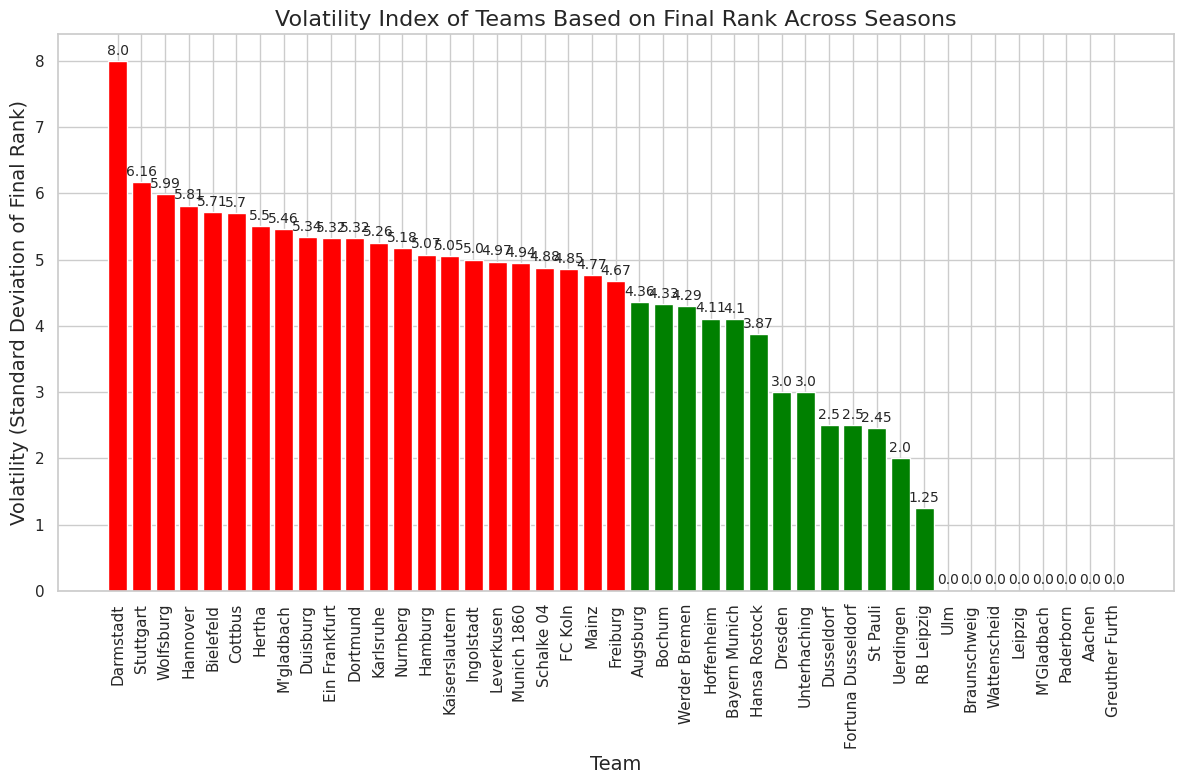

In [59]:
def calculate_volatility_index_simplified(df):
    team_ranks = {team: [] for team in set(df['HOMETEAM']).union(set(df['AWAYTEAM']))}
    for season in df['SEASON'].unique():
        season_df = df[df['SEASON'] == season]

        points = {team: 0 for team in set(season_df['HOMETEAM']).union(set(season_df['AWAYTEAM']))}

        for _, row in season_df.iterrows():
            points[row['HOMETEAM']] += row['Home_Points']
            points[row['AWAYTEAM']] += row['Away_Points']

        sorted_teams = sorted(points.items(), key=lambda x: x[1], reverse=True)
        rank = {team: i + 1 for i, (team, _) in enumerate(sorted_teams)}
        for team in points:
            team_ranks[team].append(rank.get(team, None))

    team_ranks = {team: ranks for team, ranks in team_ranks.items() if any(ranks)}
    team_volatility = {team: np.std(ranks) if len(ranks) > 1 else 0 for team, ranks in team_ranks.items()}
    volatility_df = pd.DataFrame(list(team_volatility.items()), columns=['Team', 'Volatility'])
    volatility_df = volatility_df.sort_values(by='Volatility', ascending=False)

    plt.figure(figsize=(12, 8))
    colors = ['green' if vol < volatility_df['Volatility'].median() else 'red' for vol in volatility_df['Volatility']]
    bars = plt.bar(volatility_df['Team'], volatility_df['Volatility'], color=colors)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

    plt.xlabel('Team', fontsize=14)
    plt.ylabel('Volatility (Standard Deviation of Final Rank)', fontsize=14)
    plt.title('Volatility Index of Teams Based on Final Rank Across Seasons', fontsize=16)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

calculate_volatility_index_simplified(df)


each bar represents a team

the height of the bar shows how much the team's rank has fluctuated over the seasons

a taller bar means that team's rank changed a lot (inconsistent) and a shorter bar means the team's rank stayed more stable (more consistent)

red bars stand for teams with more fluctuation (less consistent)

green bars for teams with less fluctuation (more consistent)

Part 4

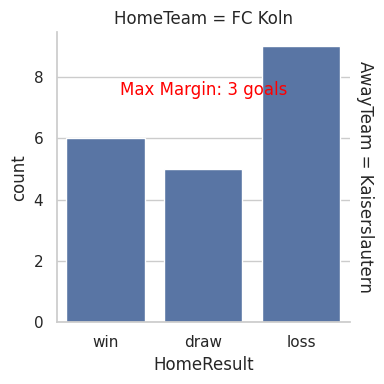

In [60]:
rivalries = [
    ("Bayern Munich", "Borussia Dortmund"),
    ("Schalke", "Borussia Mönchengladbach"),
    ("Bayer Leverkusen", "Wolfsburg"),
    ("Hamburg", "St. Pauli"),
    ("FC Koln", "Kaiserslautern")
]

results = []

for home_team, away_team in rivalries:
    rivalry_matches = df[((df['HOMETEAM'] == home_team) & (df['AWAYTEAM'] == away_team)) |
                         ((df['HOMETEAM'] == away_team) & (df['AWAYTEAM'] == home_team))]

    for _, match in rivalry_matches.iterrows():
        if match['FTHG'] > match['FTAG']:
            home_result = "win"
            away_result = "loss"
        elif match['FTHG'] < match['FTAG']:
            home_result = "loss"
            away_result = "win"
        else:
            home_result = away_result = "draw"

        results.append({
            "HomeTeam": home_team,
            "AwayTeam": away_team,
            "HomeResult": home_result,
            "AwayResult": away_result,
            "MatchDate": match['DATE'],
            "WinMargin": abs(match['FTHG'] - match['FTAG'])
        })

results_df = pd.DataFrame(results)

sns.set(style="whitegrid")
g = sns.FacetGrid(results_df, col="HomeTeam", row="AwayTeam", margin_titles=True, height=4)
g.map(sns.countplot, 'HomeResult', order=["win", "draw", "loss"])

for ax in g.axes.flat:
    max_margin_row = results_df.loc[results_df['WinMargin'].idxmax()]
    ax.annotate(f'Max Margin: {max_margin_row["WinMargin"]} goals', xy=(0.5, 0.8),
                xycoords='axes fraction', ha='center', va='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()


In [61]:
rivalries = ["Bayern Munchen", "Borussia Dortmund", "RB Leipzig", "Schalke 04", "Leverkusen"]

rivalries_data = df[
    (df['HOMETEAM'].isin(rivalries)) | (df['AWAYTEAM'].isin(rivalries))
].copy()

rivalries_data['RIVALRY'] = rivalries_data.apply(
    lambda row: f"{row['HOMETEAM']} vs {row['AWAYTEAM']}"
    if row['HOMETEAM'] in rivalries and row['AWAYTEAM'] in rivalries else None,
    axis=1
)

rivalries_data['RESULT'] = rivalries_data.apply(
    lambda row: 'H' if row['FTHG'] > row['FTAG'] else ('A' if row['FTHG'] < row['FTAG'] else 'D'),
    axis=1
)

In [62]:
rivalries_data = rivalries_data.dropna(subset=['RIVALRY'])
rivalries_count = rivalries_data.groupby(['RIVALRY', 'RESULT']).size().reset_index(name='Count')
unique_rivalries = rivalries_count['RIVALRY'].unique()

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


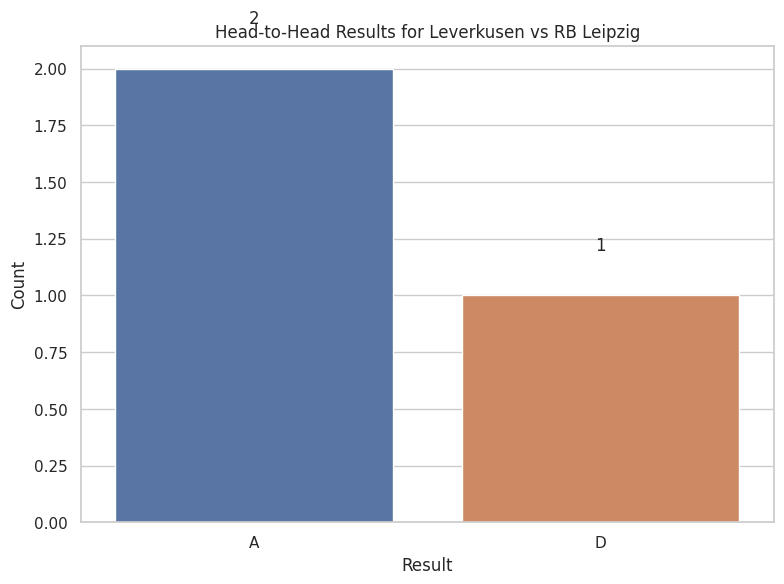

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


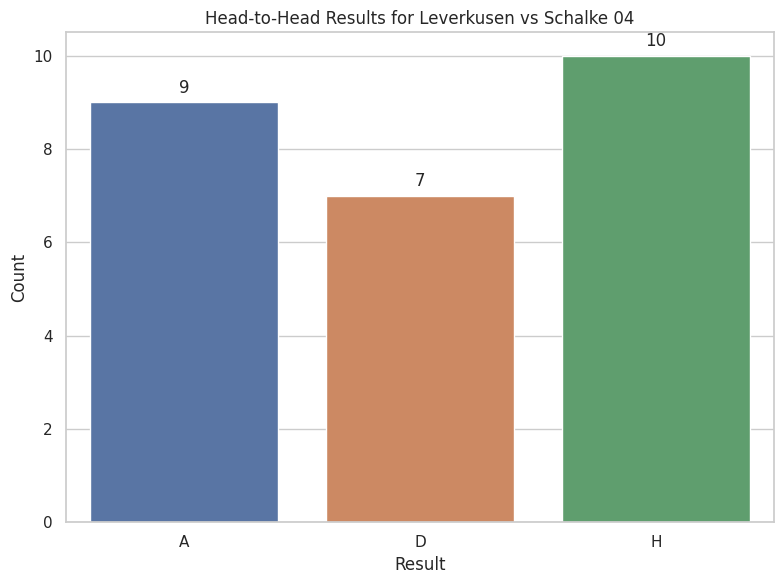

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


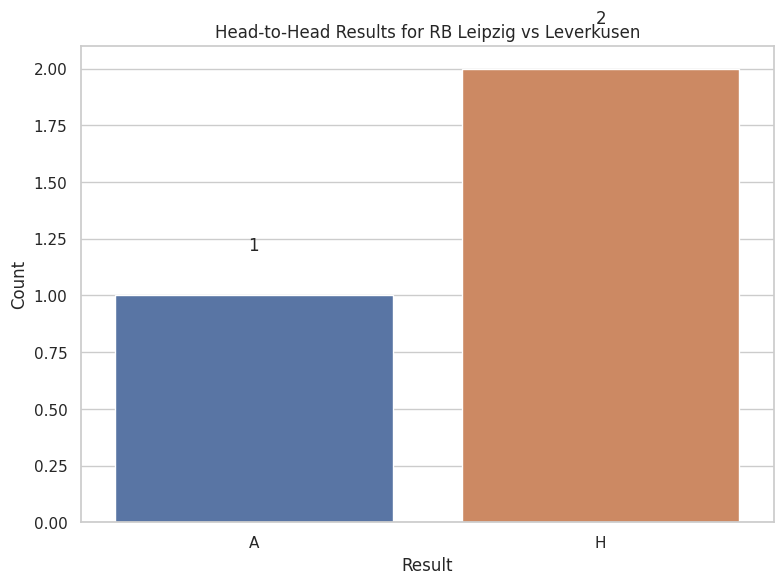

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


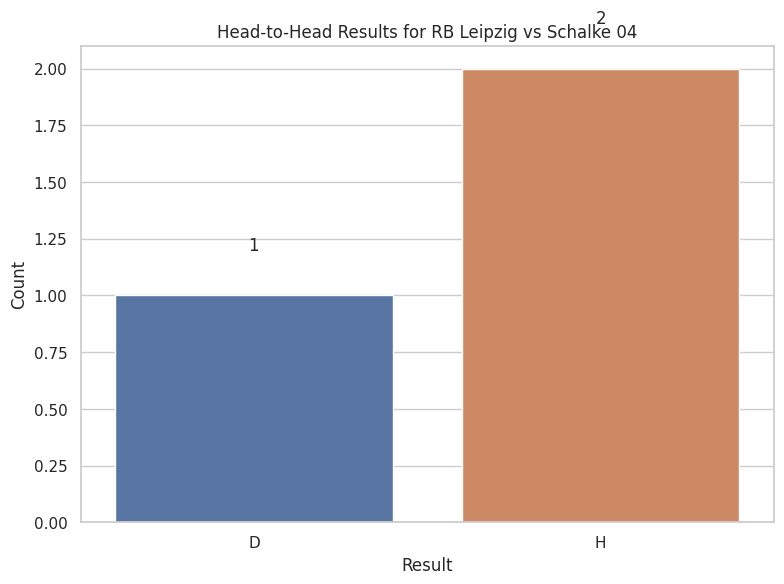

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


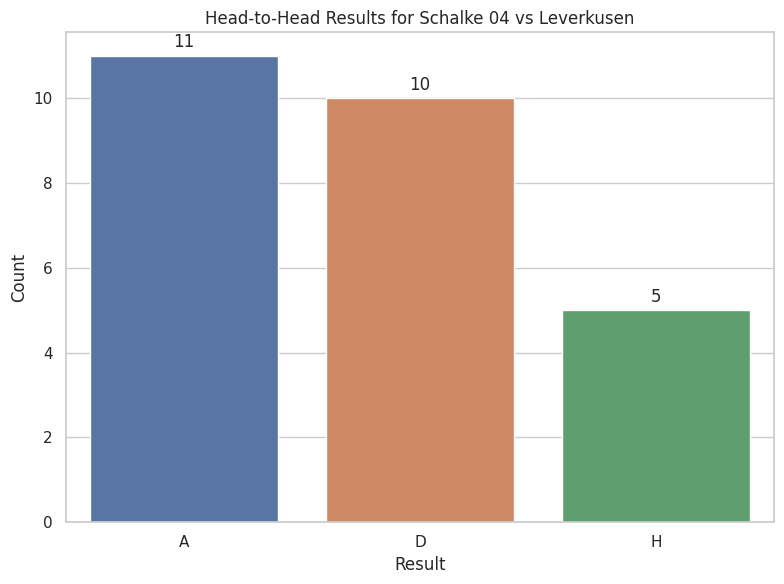

<ipython-input-63-adf53cb8d237>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)


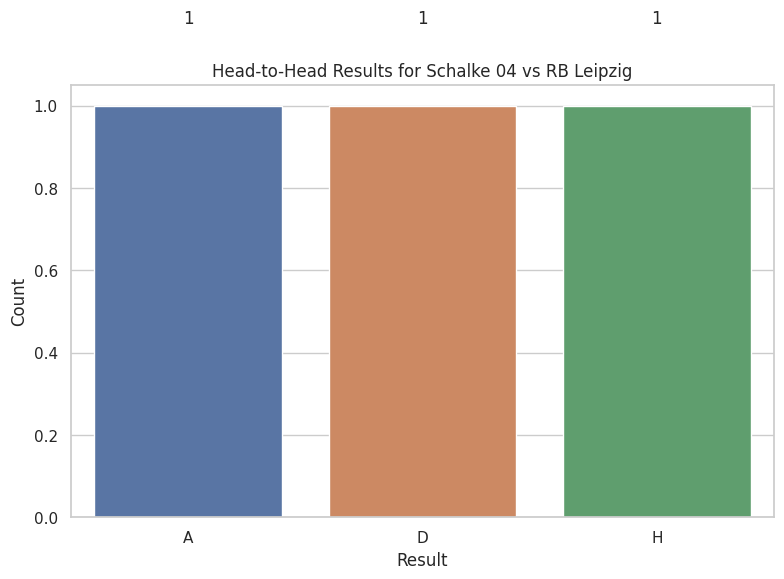

In [63]:
for rivalry in unique_rivalries:
    rivalry_data = rivalries_count[rivalries_count['RIVALRY'] == rivalry]
    plt.figure(figsize=(8, 6))
    sns.barplot(data=rivalry_data, x='RESULT', y='Count', hue='RESULT', ci=None)

    plt.xticks(rotation=0)
    plt.title(f"Head-to-Head Results for {rivalry}")
    plt.ylabel('Count')
    plt.xlabel('Result')

    for i in range(len(rivalry_data)):
        plt.text(
            x=i,
            y=rivalry_data['Count'].iloc[i] + 0.2,
            s=str(rivalry_data['Count'].iloc[i]),
            ha='center'
        )

    plt.tight_layout()
    plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956 entries, 0 to 7955
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SEASON       7956 non-null   int64         
 1   LEAGUE       7956 non-null   object        
 2   DATE         7956 non-null   datetime64[ns]
 3   HOMETEAM     7956 non-null   object        
 4   AWAYTEAM     7956 non-null   object        
 5   FTSC         7956 non-null   object        
 6   FTHG         7956 non-null   int64         
 7   FTAG         7956 non-null   int64         
 8   FTTG         7956 non-null   int64         
 9   Home_Points  7956 non-null   int64         
 10  Away_Points  7956 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 683.8+ KB


In [65]:
team_stats = df.groupby('HOMETEAM').agg(
    points=('Home_Points', 'sum'),
    goals_scored=('FTHG', 'sum'),
    goals_conceded=('FTAG', 'sum')
).reset_index()

In [66]:
team_stats['rank'] = team_stats['points'].rank(ascending=False, method='min')
top_5_teams = team_stats.sort_values(by='points', ascending=False)['HOMETEAM'].head(5).tolist()

print("Top 5 Teams based on total points:")
print(top_5_teams)

Top 5 Teams based on total points:
['Bayern Munich', 'Dortmund', 'Leverkusen', 'Schalke 04', 'Werder Bremen']


In [67]:
upsets = []

for _, row in df.iterrows():
    home_team = row['HOMETEAM']
    away_team = row['AWAYTEAM']
    home_points = row['Home_Points']
    away_points = row['Away_Points']
    home_rank = team_stats[team_stats['HOMETEAM'] == home_team]['rank'].values[0]
    away_rank = team_stats[team_stats['HOMETEAM'] == away_team]['rank'].values[0]
    rank_difference = home_rank - away_rank
    # print(f"Home: {home_team} (Rank: {home_rank}), Away: {away_team} (Rank: {away_rank}), Rank Diff: {rank_difference}, Home Points: {home_points}, Away Points: {away_points}")

    if home_rank > (away_rank + 8) and home_points > away_points:
        upsets.append({
            'home_team': home_team,
            'away_team': away_team,
            'home_rank': home_rank,
            'away_rank': away_rank,
            'home_points': home_points,
            'away_points': away_points,
            'goal_difference': row['FTHG'] - row['FTAG'],
            'rank_difference': rank_difference,
            'underdog': home_team
        })

upsets_df = pd.DataFrame(upsets)

# print(upsets_df.head())


Part 5

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


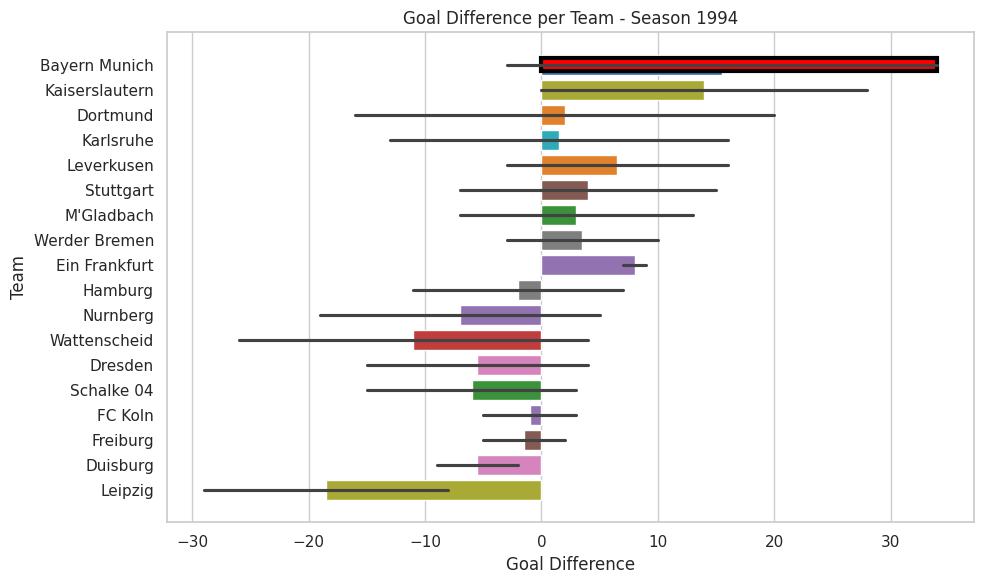

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


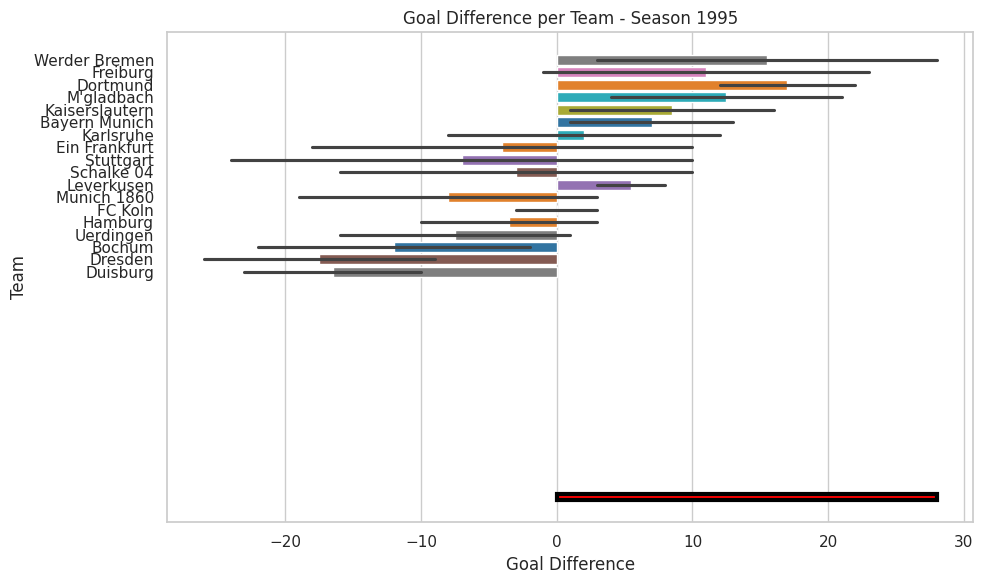

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


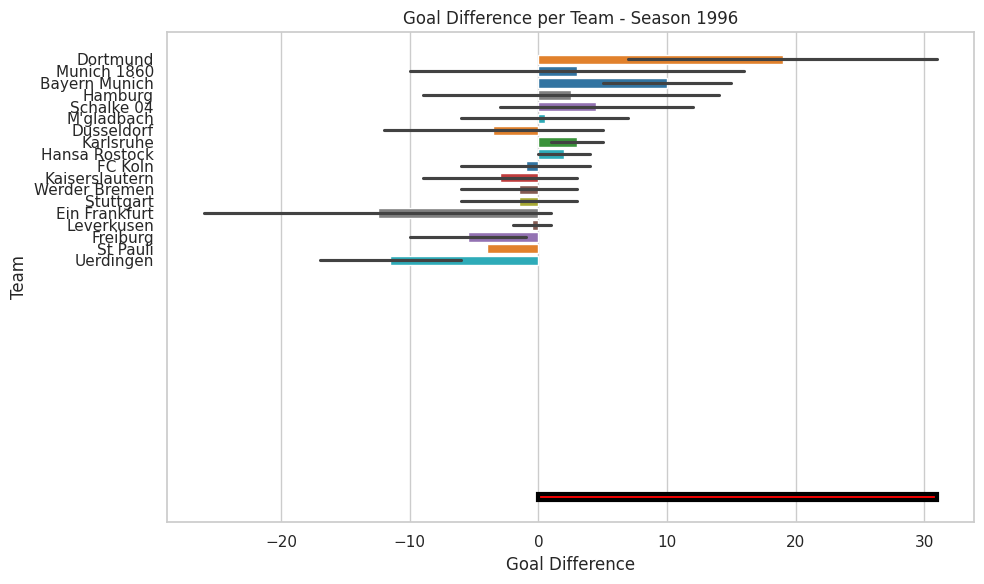

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


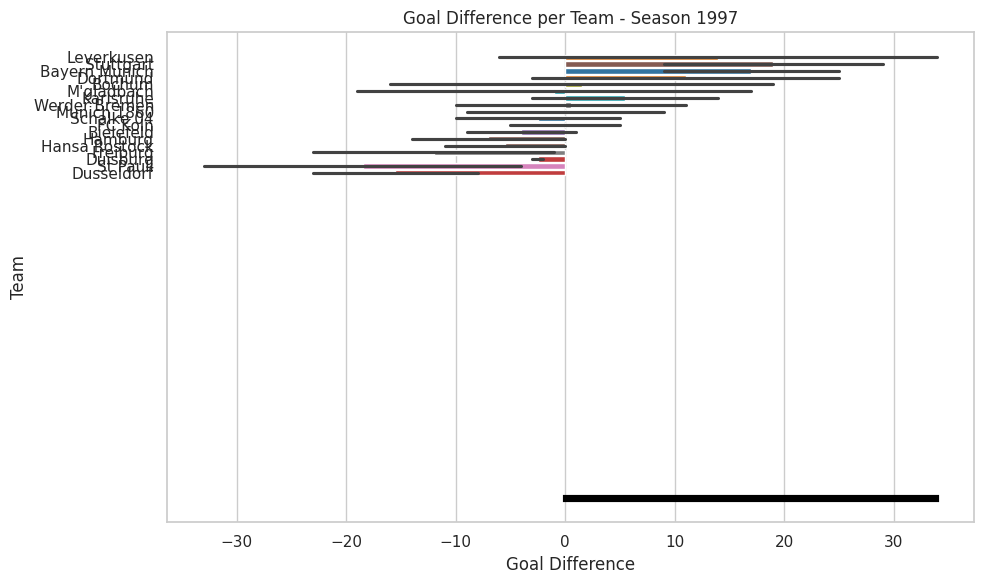

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


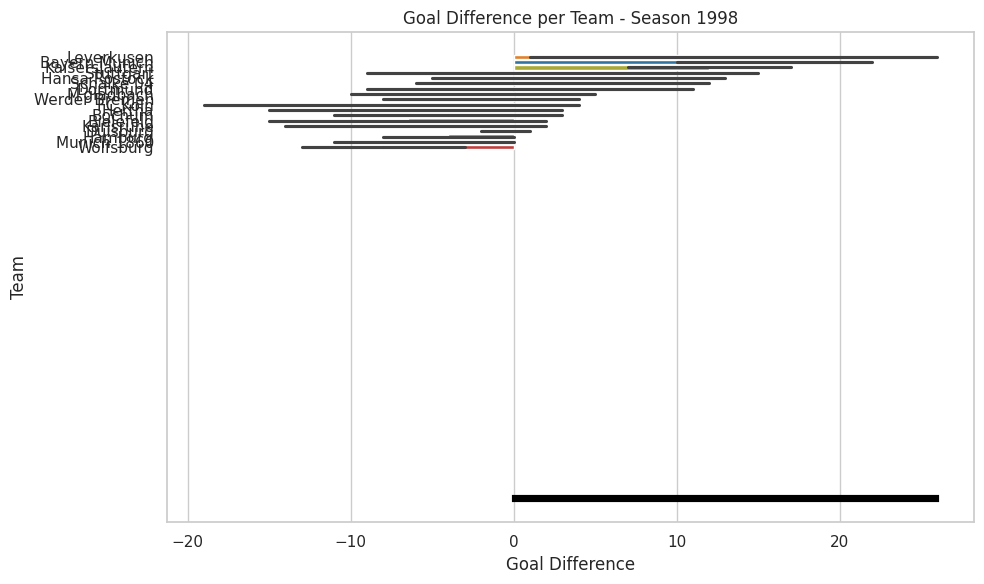

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


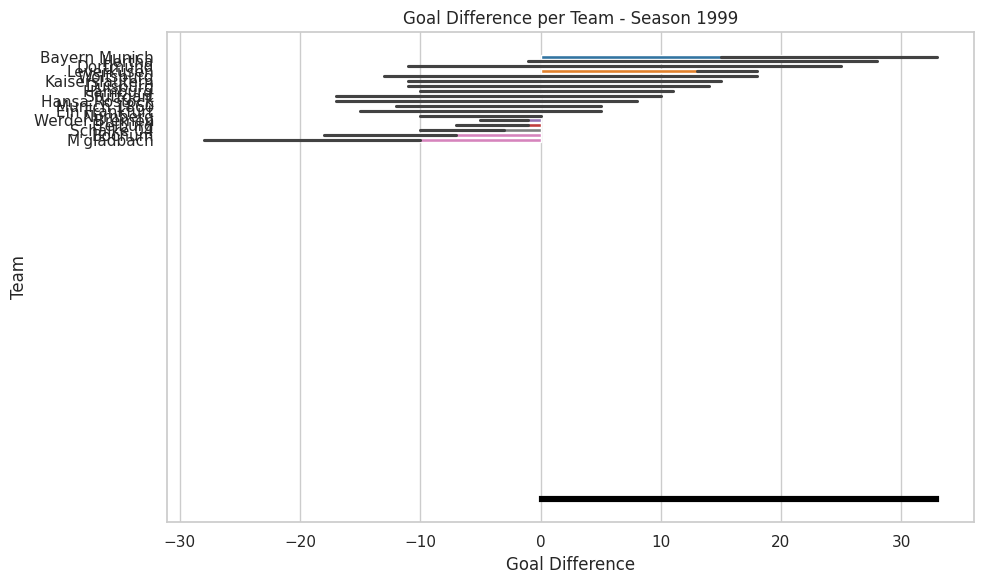

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


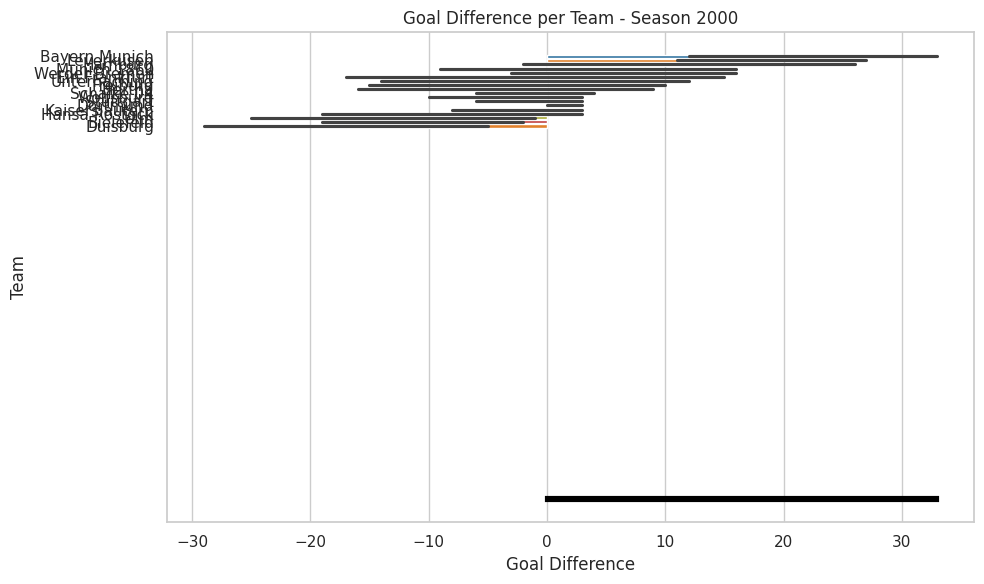

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


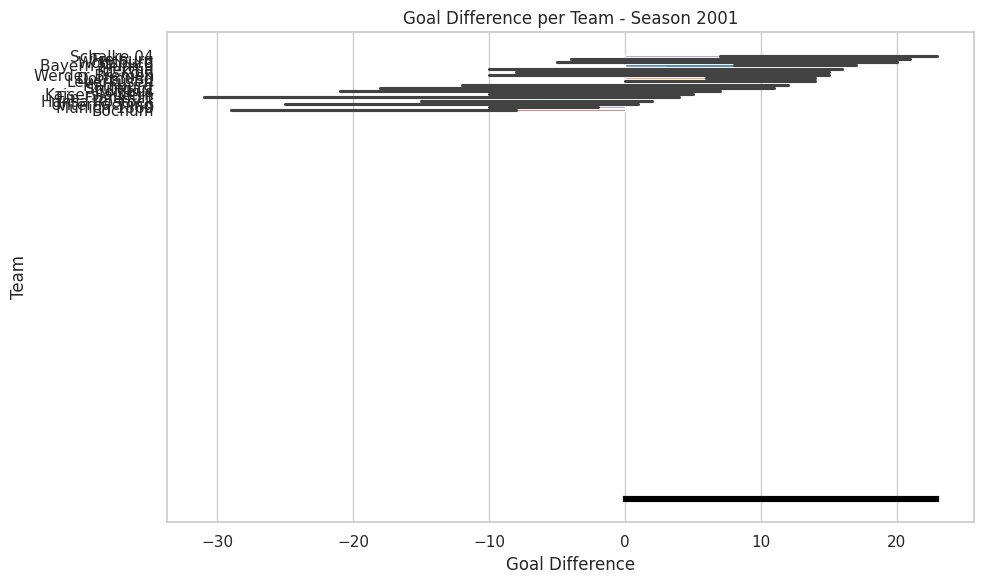

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


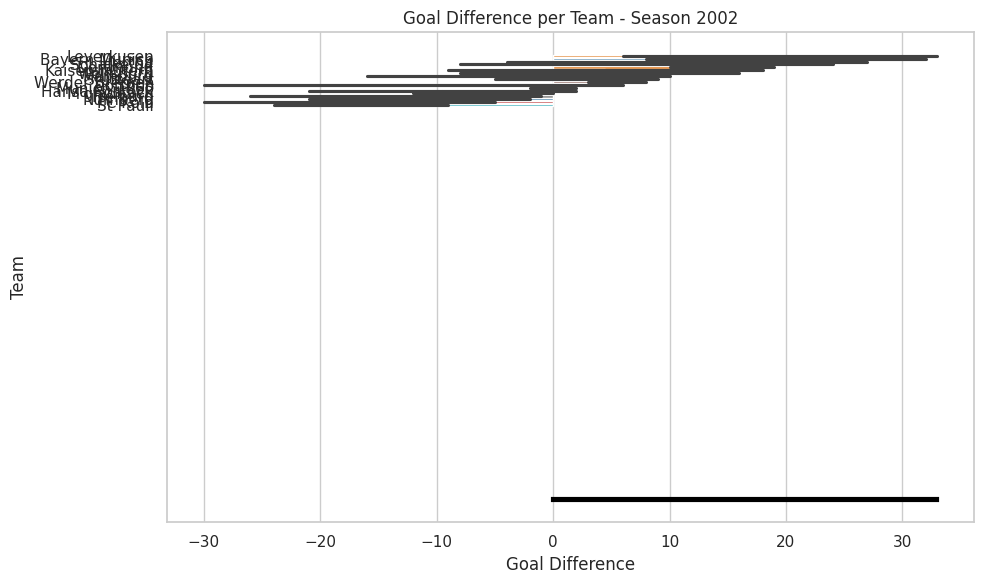

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


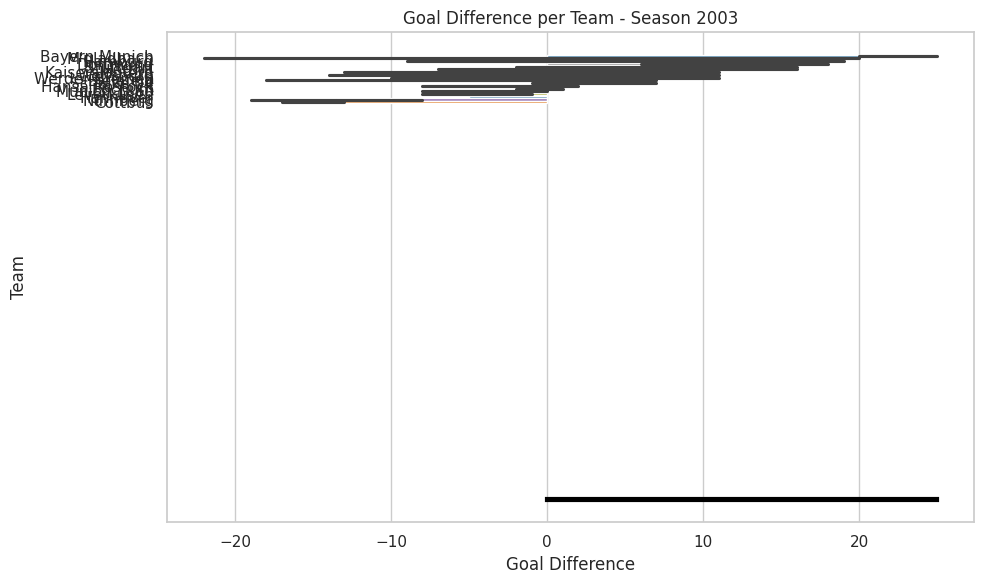

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


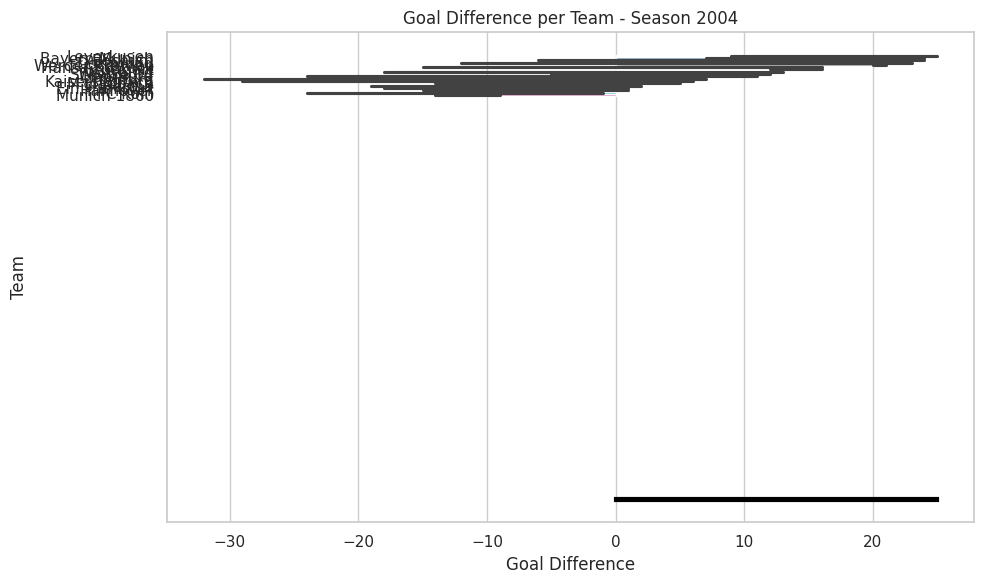

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


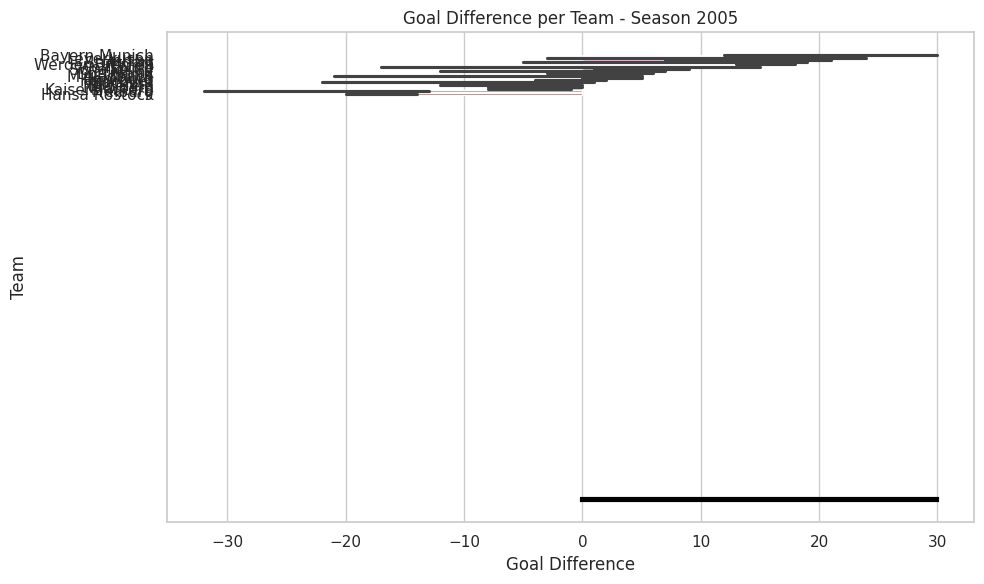

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


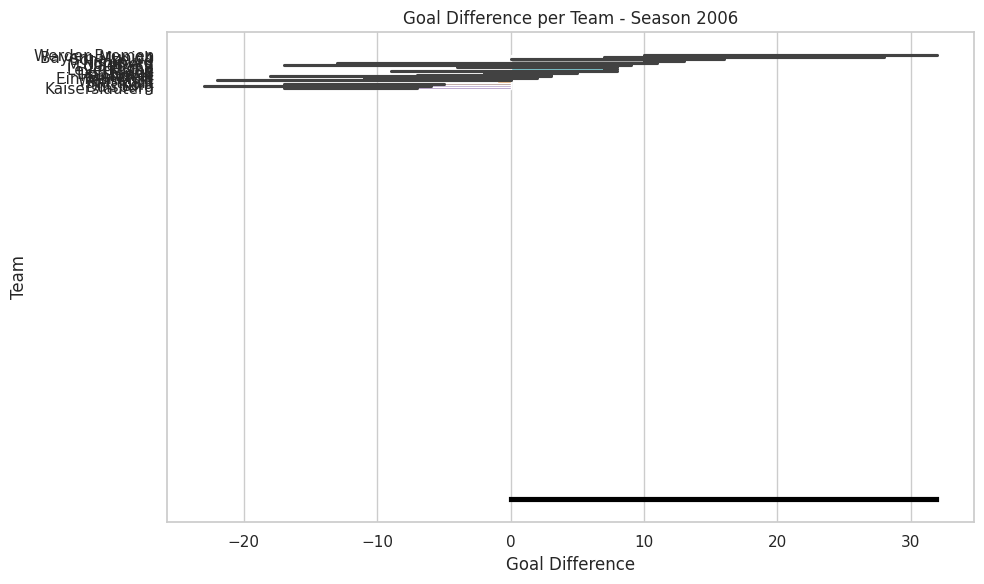

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


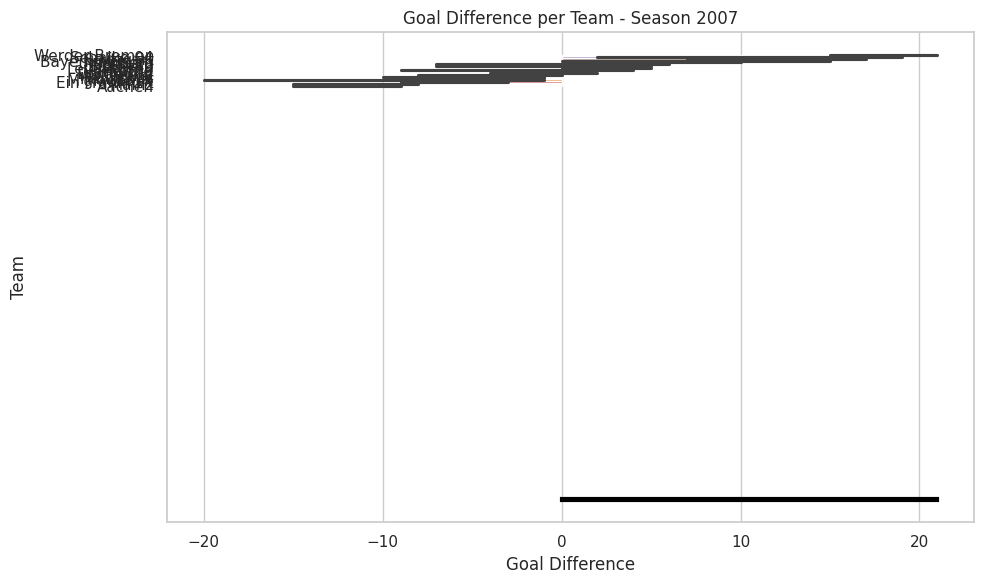

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


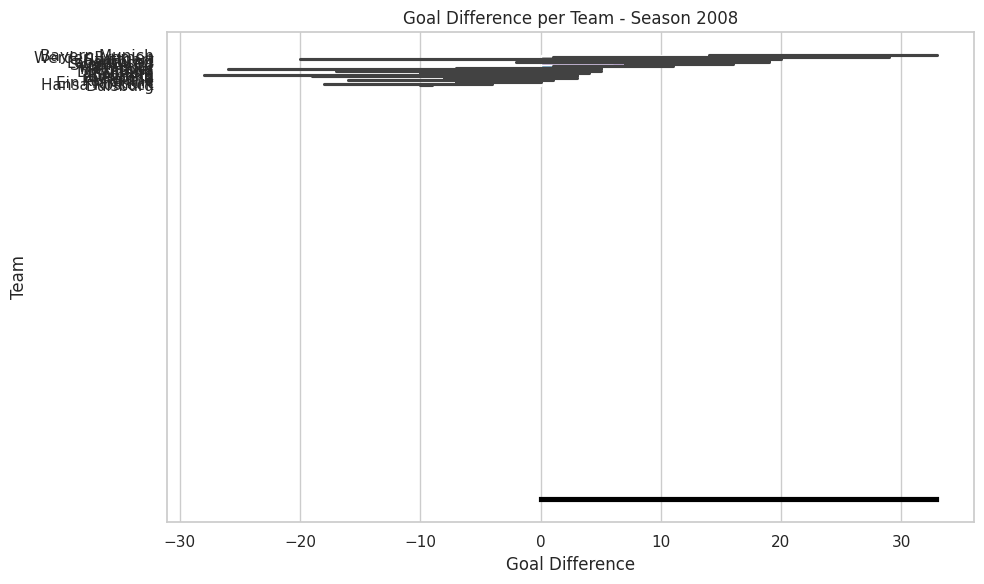

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


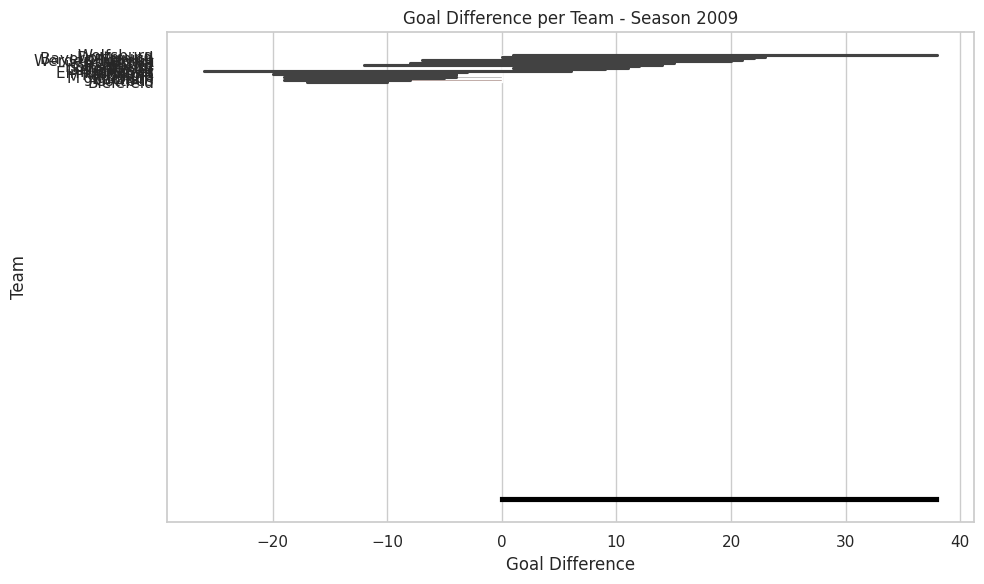

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


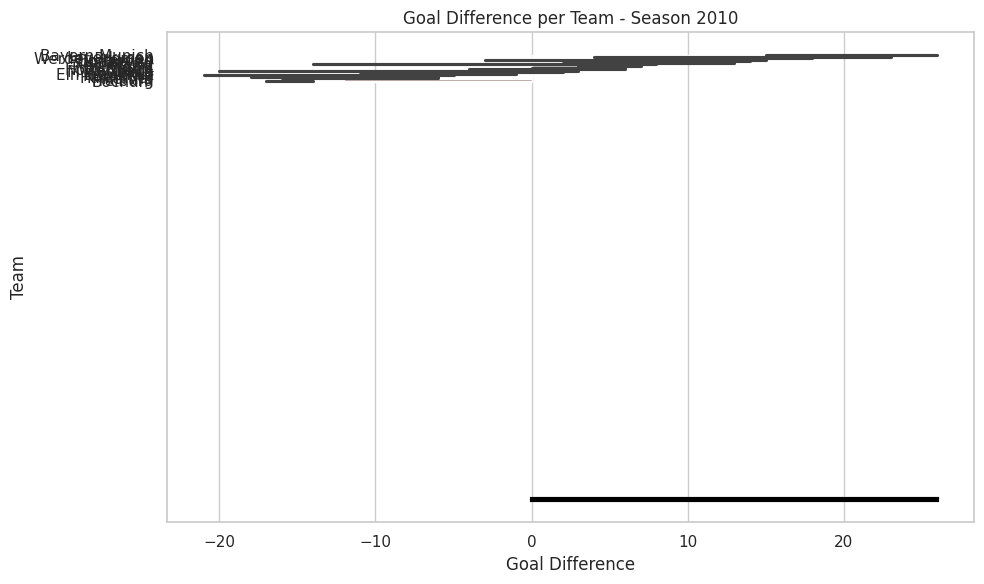

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


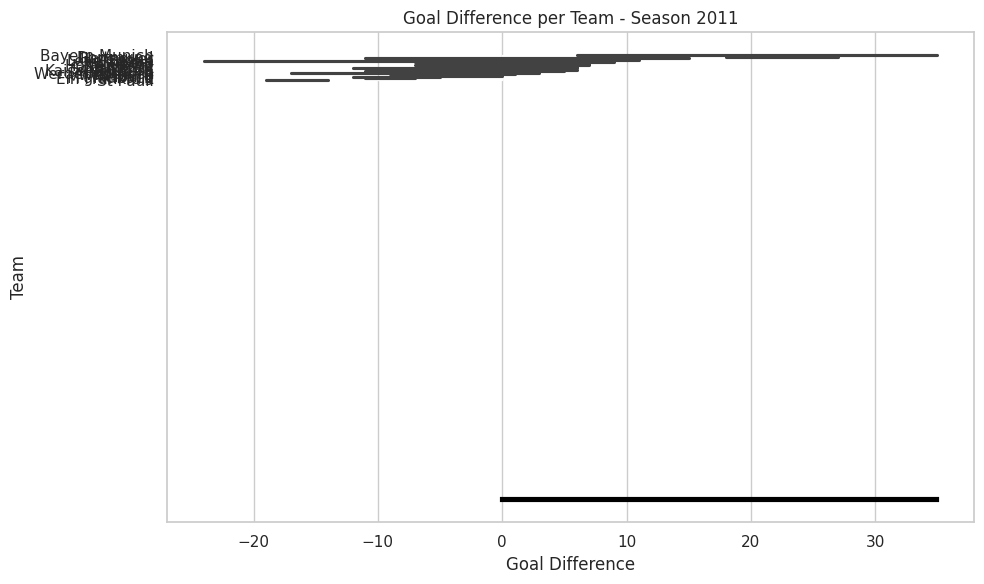

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


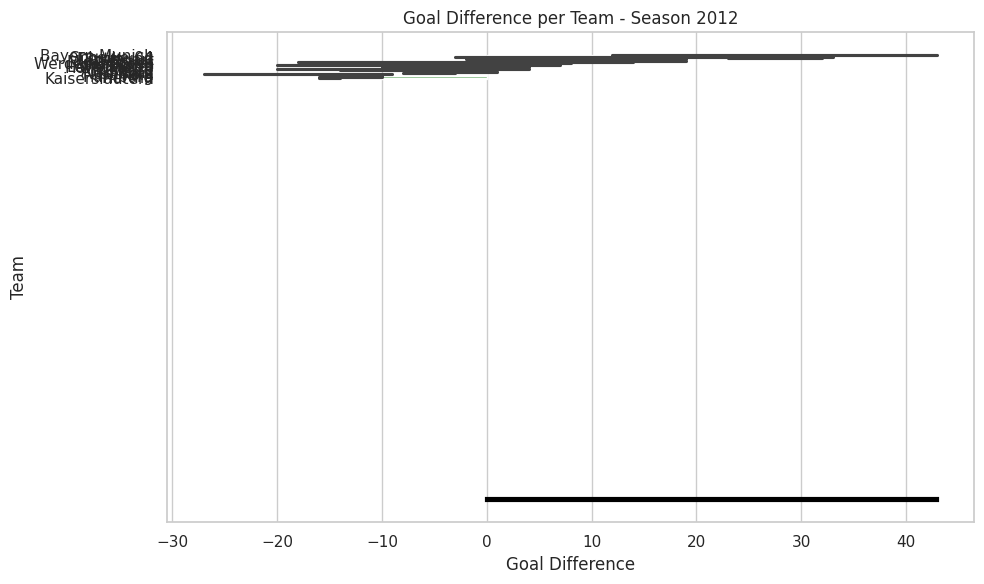

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


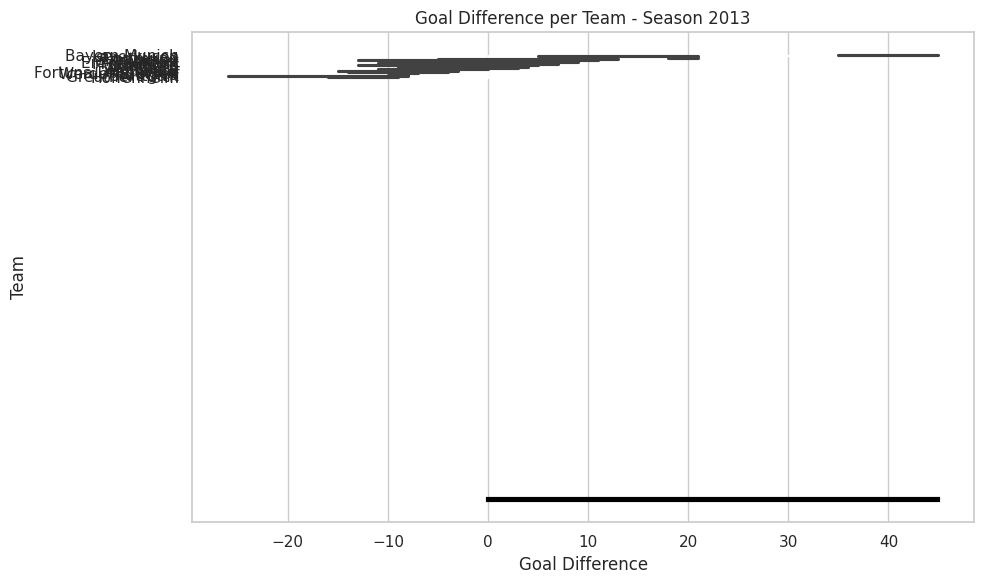

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


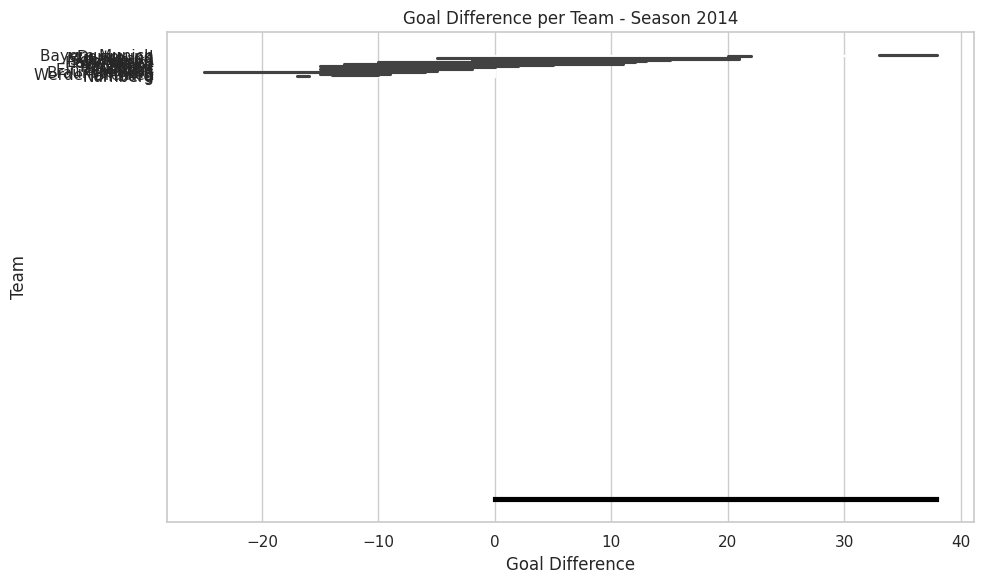

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


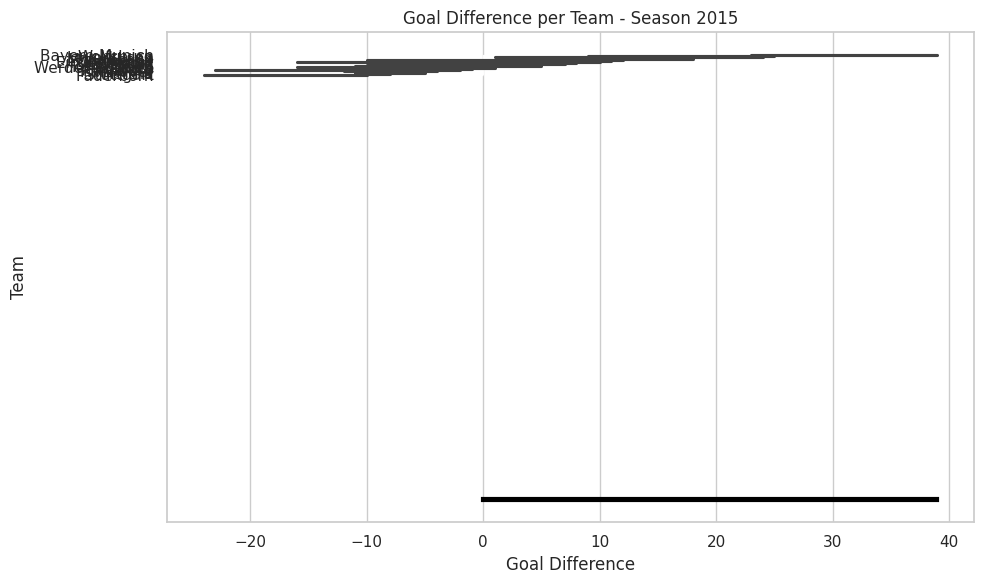

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


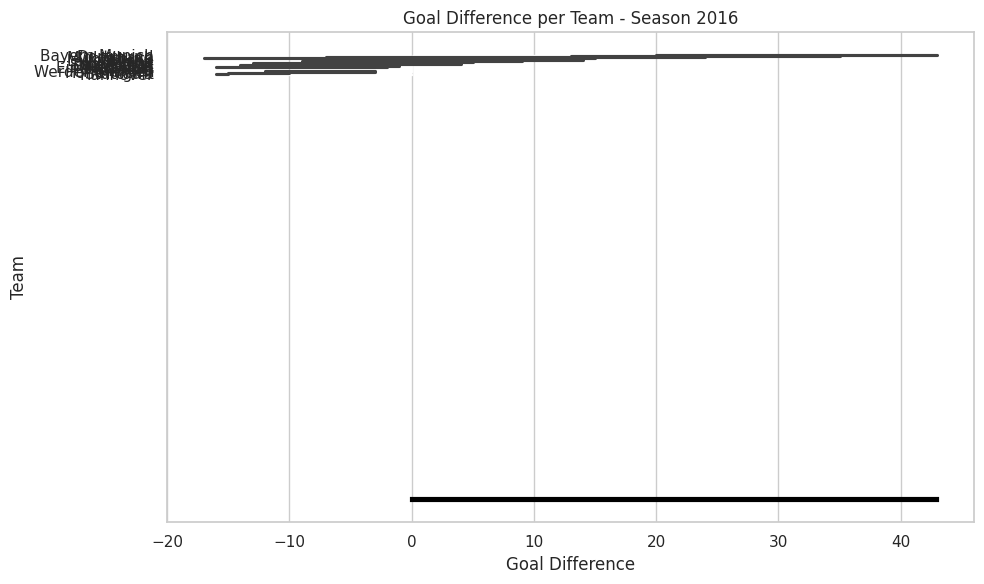

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


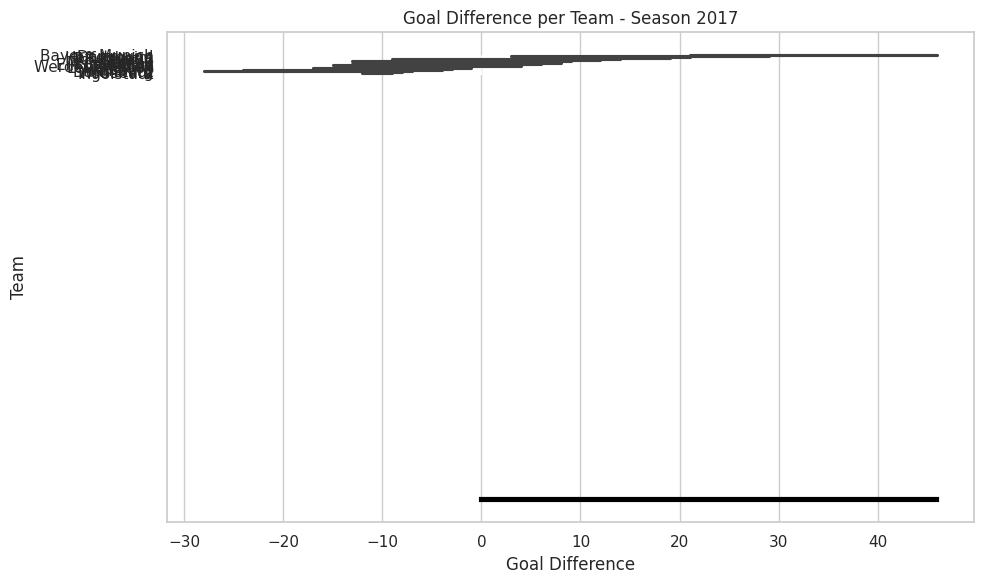

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


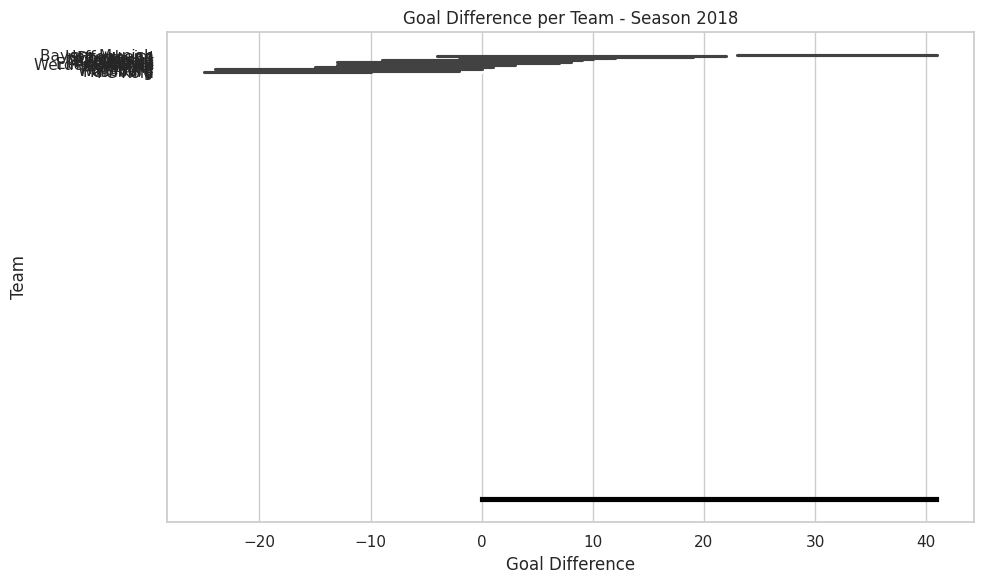

<ipython-input-68-4f10c9aa9449>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)
<ipython-input-68-4f10c9aa9449>:20: UserWarning: The palette list has more values (36) than needed (18), which may not be intended.
  sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)


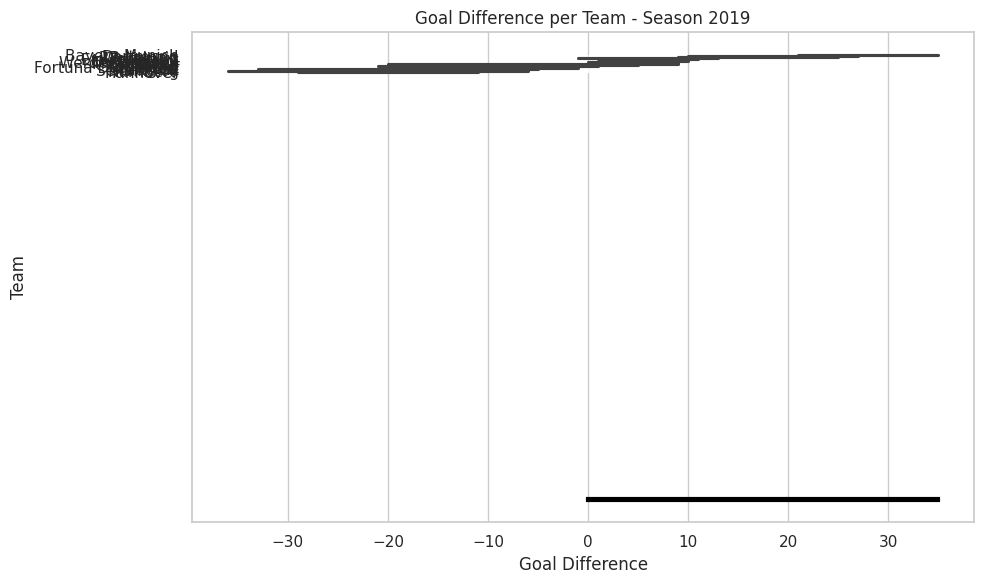

In [68]:
df['goal_difference_home'] = df['FTHG'] - df['FTAG']
df['goal_difference_away'] = df['FTAG'] - df['FTHG']

goal_difference_home = df.groupby(['SEASON', 'HOMETEAM'])['goal_difference_home'].sum().reset_index()
goal_difference_away = df.groupby(['SEASON', 'AWAYTEAM'])['goal_difference_away'].sum().reset_index()

goal_difference = pd.concat([goal_difference_home.rename(columns={'HOMETEAM': 'TEAM', 'goal_difference_home': 'goal_difference'}),
                             goal_difference_away.rename(columns={'AWAYTEAM': 'TEAM', 'goal_difference_away': 'goal_difference'})])

teams_per_season = goal_difference.groupby('SEASON')['TEAM'].unique()
unique_teams = pd.unique(goal_difference['TEAM'])
colors = sns.color_palette("tab10", len(unique_teams)).as_hex()
team_colors = {team: color for team, color in zip(unique_teams, colors)}

for season in goal_difference['SEASON'].unique():
    season_data = goal_difference[goal_difference['SEASON'] == season]

    season_data = season_data.sort_values('goal_difference', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=season_data, x='goal_difference', y='TEAM', palette=[team_colors[team] for team in season_data['TEAM']], dodge=False)

    winner_team = season_data.iloc[0]['TEAM']
    plt.gca().barh(season_data[season_data['TEAM'] == winner_team].index[0],
                   season_data[season_data['TEAM'] == winner_team]['goal_difference'].values[0],
                   color='red', height=0.5, linewidth=3, edgecolor='black')

    plt.title(f"Goal Difference per Team - Season {season}")
    plt.xlabel("Goal Difference")
    plt.ylabel("Team")
    plt.tight_layout()

    plt.show()


in these barplots for each season we have sorted teams by goal difference in descending order

 winner is highlighted (team with highest goal difference in each season)


Part 6

In [69]:
print(df['HOMETEAM'].unique())
print(df['AWAYTEAM'].unique())

['Bayern Munich' 'Dortmund' 'Duisburg' 'FC Koln' 'Hamburg' 'Leipzig'
 "M'Gladbach" 'Wattenscheid' 'Werder Bremen' 'Dresden' 'Ein Frankfurt'
 'Freiburg' 'Kaiserslautern' 'Karlsruhe' 'Leverkusen' 'Nurnberg'
 'Schalke 04' 'Stuttgart' 'Uerdingen' 'Bochum' 'Munich 1860' "M'gladbach"
 'Hansa Rostock' 'St Pauli' 'Dusseldorf' 'Bielefeld' 'Hertha' 'Wolfsburg'
 'Ulm' 'Unterhaching' 'Cottbus' 'Hannover' 'Mainz' 'Aachen' 'Hoffenheim'
 'Augsburg' 'Greuther Furth' 'Fortuna Dusseldorf' 'Braunschweig'
 'Paderborn' 'Darmstadt' 'Ingolstadt' 'RB Leipzig']
['Freiburg' 'Karlsruhe' 'Leverkusen' 'Kaiserslautern' 'Nurnberg' 'Dresden'
 'Ein Frankfurt' 'Schalke 04' 'Stuttgart' 'Duisburg' 'Werder Bremen'
 'Wattenscheid' "M'Gladbach" 'Hamburg' 'Bayern Munich' 'FC Koln'
 'Dortmund' 'Leipzig' "M'gladbach" 'Bochum' 'Munich 1860' 'Uerdingen'
 'Dusseldorf' 'St Pauli' 'Hansa Rostock' 'Bielefeld' 'Wolfsburg' 'Hertha'
 'Unterhaching' 'Ulm' 'Cottbus' 'Hannover' 'Mainz' 'Aachen' 'Hoffenheim'
 'Augsburg' 'Fortuna Dusseldorf

In [70]:
teams = ['Bayern Munich', 'Leverkusen', 'Dortmund']
team_data = df[df['HOMETEAM'].isin(teams)]

In [71]:
avg_goals = team_data.groupby('HOMETEAM')['FTHG'].mean().to_dict()

In [72]:
n_simulations = 1000
n_seasons = 10
simulated_goals = {team: [] for team in teams}

In [73]:
for team in teams:
    for _ in range(n_simulations):
        if team in avg_goals and not np.isnan(avg_goals[team]):
            simulated_goals[team].append(np.random.poisson(avg_goals[team], n_seasons).sum())

simulated_goals_df = pd.DataFrame(simulated_goals)

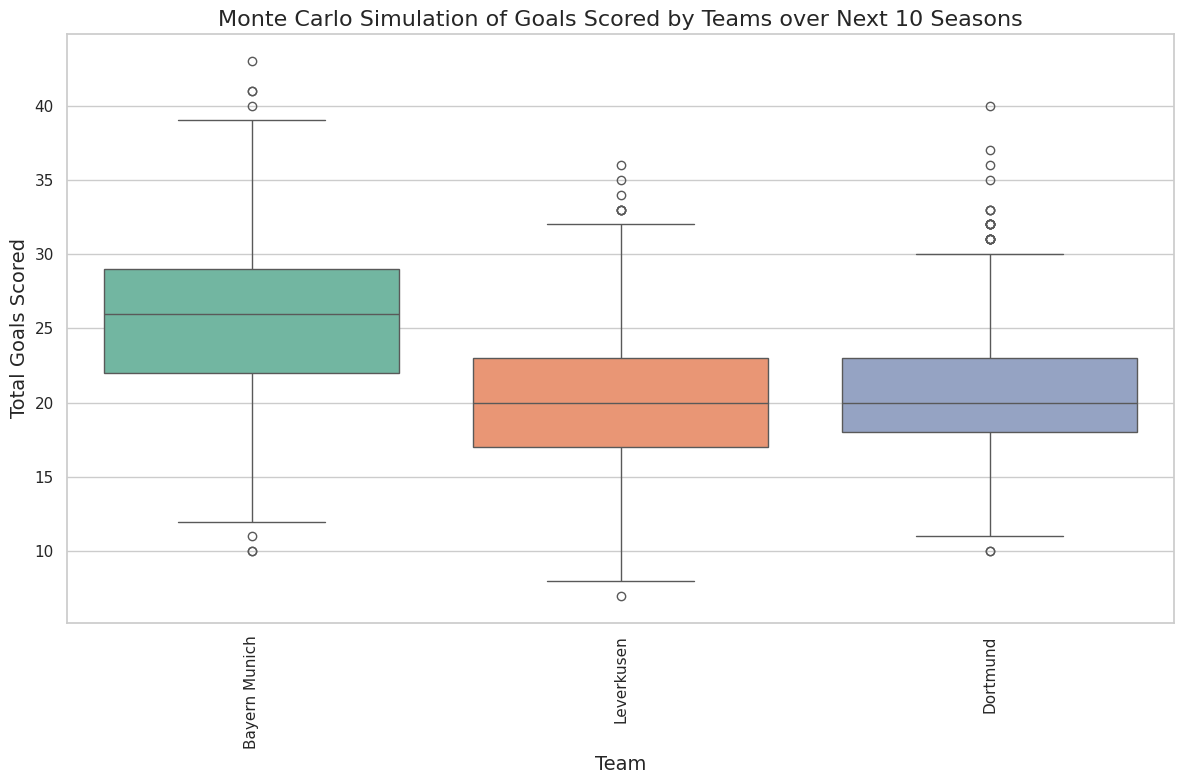

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=simulated_goals_df, palette='Set2')
plt.title("Monte Carlo Simulation of Goals Scored by Teams over Next 10 Seasons", fontsize=16)
plt.xlabel("Team", fontsize=14)
plt.ylabel("Total Goals Scored", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Bayern Munich will still be higher than leverkusen and dortmund having a median of ~26, while others are lower